Оформляем единый github-репозиторий, в котором представлены результаты всех 5 лабораторных работ. Github-репозиторий должен обязательно содержать readme + jupyter-notebook, в котором даны комментарии к каждой ячейке с кодом.

**Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)**

1.	Выбор начальных условий

a.	Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)  
b.	Выбрать набор данных для задачи регрессии классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)  
c.	Выбрать метрики качества и обосновать их выбор  

2.	Создание бейзлайна и оценка качества

a.	Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных  
b.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  

3.	Улучшение бейзлайна

a.	Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)  
b.	Проверить гипотезы  
c.	Сформировать улучшенный бейзлайн по результатам проверки гипотез  
d.	Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных  
e.	Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2   
g.	Сделать выводы  

4.	Имплементация алгоритма машинного обучения

a.	Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)  
b.	Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных  
c.	Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
d.	Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2   
e.	Сделать выводы  
f.	Добавить техники из улучшенного бейзлайна (пункт 3с)  
g.	Обучить модели (для классификации и регрессии) для выбранных наборов данных  
h.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
i.	Сравнить результаты моделей в сравнении с результатами из пункта 3  
j.	Сделать выводы  


**Лабораторная работа №2 (Проведение исследований с логистической и линейной регрессией)** – повтор пунктов 2-4 из лабораторной работы №1

**Лабораторная работа №3 (Проведение исследований с решающим деревом)** – повтор пунктов 2-4 из лабораторной работы №1

**Лабораторная работа №4 (Проведение исследований со случайным лесом)** – повтор пунктов 2-4 из лабораторной работы №1

**Лабораторная работа №5 (Проведение исследований с градиентным бустингом)** – повтор пунктов 2-4 из лабораторной работы №1 + подведение итогов / сравнение результатов, полученных всеми алгоритмами из лабораторных 1-5)


# **1. Выбор начальных условий**

*a. b. Выбор набора данных для задачи классификации и регрессии и обоснование его выбора (реальная практическая задача)*

**Выбор набора данных**: для решения задачи классификации и\\\ регрессии был выбран датасет, содержащий информацию о различных смартфонах, их характеристиках и ценах. Этот выбор обусловлен тем, что задача предполагает как предсказание точной цены смартфона (с помощью регрессии), так и классификацию по ценовым категориям. Датасет включает важные параметры, такие как бренд, модель, объем памяти и места на телефоне, что позволяет не только строить прогнозы по цене, но и классифицировать смартфоны по ценовым классам. Для классификации ценовых категорий будет использован метод квантилей, что позволяет гибко разделить диапазон цен на более информативные группы. Это важно для прикладной задачи, так как позволяет более точно определять, в какой ценовой группе окажется смартфон в зависимости от его характеристик.

**Контекст задачи**: задача основана на реальной прикладной проблеме: оценка цен на смартфоны для нового мобильного бренда. Это важно для понимания, как характеристики смартфонов влияют на их стоимость на рынке. Выбор классификации по диапазонам цен, а не конкретным числовым значениям, более подходит для задач, где нужно работать с ценовыми сегментами, что делает задачу более универсальной и практичной для анализа рынка.

Подтянем датасет из гугл диска

Ссылка на сам датасет: https://www.kaggle.com/datasets/juanmerinobermejo/smartphones-price-dataset

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Мультимедиа/smartphones.csv"
df_raw = pd.read_csv(file_path)

df = df_raw.copy()

Предварительный анализ данных

In [3]:
# Посмотрим размерности датасета

df.shape

(1816, 8)

Мы видим, что в наборе данных 1816 экземпляров и 8 атрибутов.

Один из атрибутов - цена, что является целевой переменной, а остальные 7 атрибутов должны помочь сделать выводы о цене телефона

In [4]:
# Предварительный просмотр датасета

df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [5]:
# Проверим является ли название смартфона уникальным параметром

df['Smartphone'].nunique()

1816

Удалим избыточный столбец Smartphone из набора данных, который не имеет никакой прогностической силы.

In [6]:
# Удаление столбца Smartphone из датасета

df.drop('Smartphone', axis=1, inplace=True)

In [7]:
# Просмотр сводной информации о наборе данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1816 non-null   object 
 1   Model        1816 non-null   object 
 2   RAM          1333 non-null   float64
 3   Storage      1791 non-null   float64
 4   Color        1816 non-null   object 
 5   Free         1816 non-null   object 
 6   Final Price  1816 non-null   float64
dtypes: float64(3), object(4)
memory usage: 99.4+ KB


Мы видим, что столбец Smartphone был удален из набора данных.

Можем заметить, что в наборе данных есть 3 числовых переменных и 4 категориальных переменных (в данный момент являющиеся object), которые преобразуем в численные.Также присутствуют пропущенные значения в RAM и Storage, что пополним медианным значением. Ещё добавим целевой столбец для классификации - 'Price class' для определения ценового диапазона телефона ('Low'/'Medium'/'High'/'Very high')

In [8]:
categorical_columns = ["Brand", "Model", "Color", "Free"]
for col in categorical_columns:
  print(f'{col}: {df[col].nunique()}')

Brand: 37
Model: 383
Color: 17
Free: 2


Так как уникальных элементов много, применение One-Hot Encoding приведёт к увеличению количества атрибутов в 50+ раз, из-за чего попытаюсь применить Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# Кодирование категориальных переменных с использованием частоты
label_encoders = {}
categorical_columns = ["Brand", "Model", "Color", "Free"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
0,27,104,8.0,256.0,16,1,231.60
1,29,162,4.0,128.0,1,1,279.00
2,20,220,4.0,128.0,1,1,179.01
3,35,301,6.0,128.0,6,1,279.99
4,22,268,12.0,512.0,15,1,799.00


In [11]:
# Заполнение пропущенных значений в столбце RAM медианой
df['RAM'] = df['RAM'].fillna(df['RAM'].median())

# Заполнение пропущенных значений в столбце Storage медианой
df['Storage'] = df['Storage'].fillna(df['Storage'].median())

In [12]:
# Разбиение на классы на основе квантилей
num_classes = 4
# num_classes = 2
borders = pd.qcut(df['Final Price'], q=num_classes, labels=False, retbins=True)[1]

# Новый список меток для классов
class_labels = ['Low', 'Medium', 'High', 'Very high']
# class_labels = ['Budget', 'Luxury']

# Функция для присвоения классов
def price_class(price):
    for i in range(1, num_classes+1):
        if price <= borders[i]:
            return class_labels[i-1]

# Применение функции к столбцу 'Final Price'
df["Price Class"] = df["Final Price"].apply(price_class)


In [13]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price,Price Class
0,27,104,8.0,256.0,16,1,231.60,Medium
1,29,162,4.0,128.0,1,1,279.00,Medium
2,20,220,4.0,128.0,1,1,179.01,Low
3,35,301,6.0,128.0,6,1,279.99,Medium
4,22,268,12.0,512.0,15,1,799.00,Very high


In [14]:
# Просмотр сводной статистики в числовых переменных

print(round(df.describe(),2))

         Brand    Model      RAM  Storage   Color     Free  Final Price
count  1816.00  1816.00  1816.00  1816.00  1816.0  1816.00      1816.00
mean     22.73   209.67     5.97   162.18     5.1     0.98       492.18
std      12.01   117.86     2.29   138.51     5.3     0.15       398.61
min       0.00     0.00     1.00     2.00     0.0     0.00        60.46
25%      15.00   131.00     4.00    64.00     0.0     1.00       200.99
50%      29.00   188.50     6.00   128.00     5.0     1.00       349.99
75%      32.00   311.00     8.00   256.00     9.0     1.00       652.72
max      36.00   382.00    12.00  1000.00    16.0     1.00      2271.28


*c. Выбор меток качества и обоснование их выбора*

Для задачи **классификации**:

**Accuracy (Точность)**: показывает процент правильных предсказаний модели от общего числа. Она полезна, когда классы сбалансированы, и помогает оценить общую эффективность классификатора.

**Balanced Accuracy (Сбалансированная точность)**: учитывает дисбаланс классов, рассчитывая среднее значение точности для каждого класса отдельно. Она используется, когда классы имеют неравномерное распределение, чтобы избежать искажения результатов, характерного для обычной точности.

Для задачи **регрессии**:

**MAE (Mean Absolute Error — Средняя абсолютная ошибка)**: измеряет среднее абсолютное отклонение предсказанных значений от истинных. MAE полезна, когда важно просто измерить, насколько предсказания отклоняются от реальных значений, без учета их направления (положительное или отрицательное отклонение).

**MAPE (Mean Absolute Percentage Error — Средняя абсолютная процентная ошибка)**: метрическая ошибка, выраженная в процентах. MAPE полезна, когда важен масштаб ошибки относительно величины предсказания и удобно сравнивать ошибки по разных масштабах данных.

**MSE (Mean Squared Error — Среднеквадратичная ошибка)**: эта метрика измеряет среднюю квадратичную ошибку между предсказанными и реальными значениями. Она более чувствительна к большим ошибкам, так как квадратично накапливает отклонения. MSE используется для задач, где важно минимизировать большие ошибки.

**RMSE (Root Mean Squared Error — Квадратный корень из среднеквадратичной ошибки)**: корень из MSE, что позволяет вернуть ошибку в ту же единицу измерения, что и данные. RMSE предоставляет более интерпретируемую метрику и полезна для задач, где важно минимизировать большие отклонения.

# Функции отрисовки

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Диаграмма рассеяния: тестовая выборка
def plot_scattering_diagram(y_true, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_true, y_pred, color='blue', label='Предсказания')
  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Идеальная линия')
  plt.xlabel("Фактические значения")
  plt.ylabel("Предсказанные значения")
  plt.title("Сравнение фактических и предсказанных значений (Тестовая выборка)")
  plt.legend()
  plt.show()

# Создание матрицы ошибок
def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  # Определение меток классов
  class_names = ['Класс 1', 'Класс 2', 'Класс 3', 'Класс 4']
  # class_names = ['Budget', 'Luxury']
  # Создание графика
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)

  plt.ylabel('Настоящий класс')
  plt.xlabel('Предсказанный класс')
  plt.title('Матрица ошибок')
  plt.show()

# Оценка качества классификации
def evaluate_classification(y_test, y_pred, comment):
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

  print(comment)
  print(f'Accuracy = {accuracy}')
  print(f'Balanced accuracy = {balanced_accuracy}')

# Оценка качества регрессии
def evaluate_regression(y_test, y_pred, comment):

    # Функция для расчета MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Функция для расчета RMSE
    def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(comment)
    print(f'MAE = {mae:.4f}')
    print(f'MAPE = {mape:.4f}%')
    print(f'MSE = {mse:.4f}')
    print(f'RMSE = {rmse:.4f}')

# **Лабораторная работа 1**

# **Проведение исследований с алгоритмом KNN**

## **2. Создание бейзлайна и оценка качества**

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [17]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [18]:
# Разделение данных для классификации

# Странно обучать как по уже известным классам найти тот же самый класс
# Так и как по уже известной стоимости найти класс определённый через стоимость
X_classification_base = df_base.drop(["Final Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

KNeighborsClassifier(n_neighbors=3)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [19]:
y_test_pred_cls_base = knn_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = knn_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.6291208791208791
Balanced accuracy = 0.6245222574583039

Оценка на тренировочной выборке:
Accuracy = 0.7816804407713499
Balanced accuracy = 0.7823654376653626


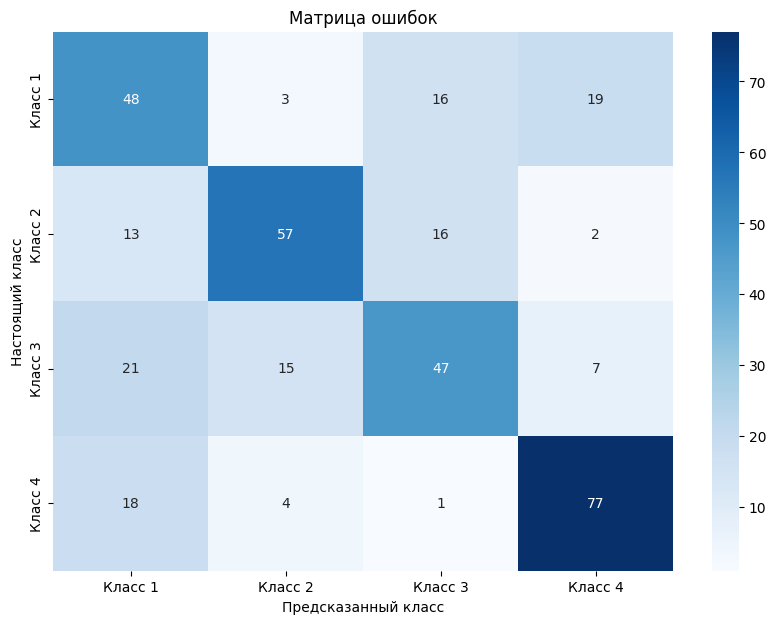

In [20]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 62.91%, что является достаточно хорошим результатом при предсказании одного из 4 классов.

In [21]:
# Проверяем нулевую оценку точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2747


:Мы видим, что показатель точности нашей модели равен 0,6291, а нулевой показатель точности равен 0,2747. Таким образом, мы можем заключить, что наша модель K ближайших соседей хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [22]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Final Price', 'Price Class'], axis=1)
y_regression_base = df_base["Final Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

KNeighborsRegressor(n_neighbors=3)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [23]:
y_test_pred_reg_base = knn_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = knn_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 158.5869
MAPE = 38.1310%
MSE = 60848.7881
RMSE = 246.6755

Оценка на тренировочной выборке:
MAE = 98.0171
MAPE = 24.6058%
MSE = 25689.6937
RMSE = 160.2800


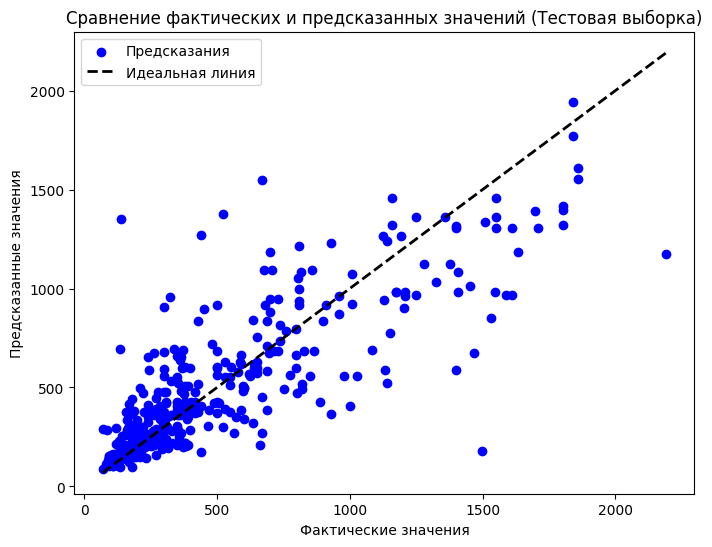

In [24]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

Важно заметить, что метрики, такие как MAPE (38.13%) на валидационной выборке и MAE (158.59), не слишком высокие. Это значит, что модель, хоть и не идеальна, может быть вполне использована для задач с определёнными погрешностями, особенно если требования к точности не слишком строгие

## **3. Улучшение бейзлайна**

In [25]:
df_optimized = df.copy()

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

**Препроцессинг данных**

Определим количество пустых значений в каждой фиче

In [26]:
df_optimized.isna().sum()

,0
Brand,0
Model,0
RAM,0
Storage,0
Color,0
Free,0
Final Price,0
Price Class,0


Пустых значений нет

Посмотрим количество каждых значений

In [27]:
df_optimized.nunique()

,0
Brand,37
Model,383
RAM,7
Storage,12
Color,17
Free,2
Final Price,1022
Price Class,4


Выведем основные характеристики фичей

In [28]:
df_optimized.describe().round(2)

,Brand,Model,RAM,Storage,Color,Free,Final Price
count,1816.00,1816.00,1816.00,1816.00,1816.0,1816.00,1816.00
mean,22.73,209.67,5.97,162.18,5.1,0.98,492.18
std,12.01,117.86,2.29,138.51,5.3,0.15,398.61
min,0.00,0.00,1.00,2.00,0.0,0.00,60.46
25%,15.00,131.00,4.00,64.00,0.0,1.00,200.99
50%,29.00,188.50,6.00,128.00,5.0,1.00,349.99
75%,32.00,311.00,8.00,256.00,9.0,1.00,652.72
max,36.00,382.00,12.00,1000.00,16.0,1.00,2271.28


Количество дубликатов

In [29]:
df_optimized[df_optimized.duplicated()]

,Brand,Model,RAM,Storage,Color,Free,Final Price,Price Class
58,35,296,2.0,32.0,0,1,109.00,Low
234,20,114,8.0,256.0,5,1,491.64,High
348,20,285,8.0,256.0,5,1,899.01,Very high
465,29,170,8.0,256.0,6,1,649.00,High
562,29,169,6.0,128.0,1,1,649.00,High
699,29,138,4.0,128.0,0,1,209.00,Medium
790,1,379,6.0,64.0,0,1,439.00,High
812,29,181,12.0,256.0,7,1,1799.00,Very high
847,7,349,12.0,256.0,0,1,249.95,Medium
961,29,170,6.0,128.0,10,1,759.00,Very high


Дубликаты есть, так что удалим их

In [30]:
df_optimized = df_optimized.drop_duplicates()

In [31]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1799 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1799 non-null   int64  
 1   Model        1799 non-null   int64  
 2   RAM          1799 non-null   float64
 3   Storage      1799 non-null   float64
 4   Color        1799 non-null   int64  
 5   Free         1799 non-null   int64  
 6   Final Price  1799 non-null   float64
 7   Price Class  1799 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 126.5+ KB


**Визуализация данных**

Посмотрим на распределения у фичей

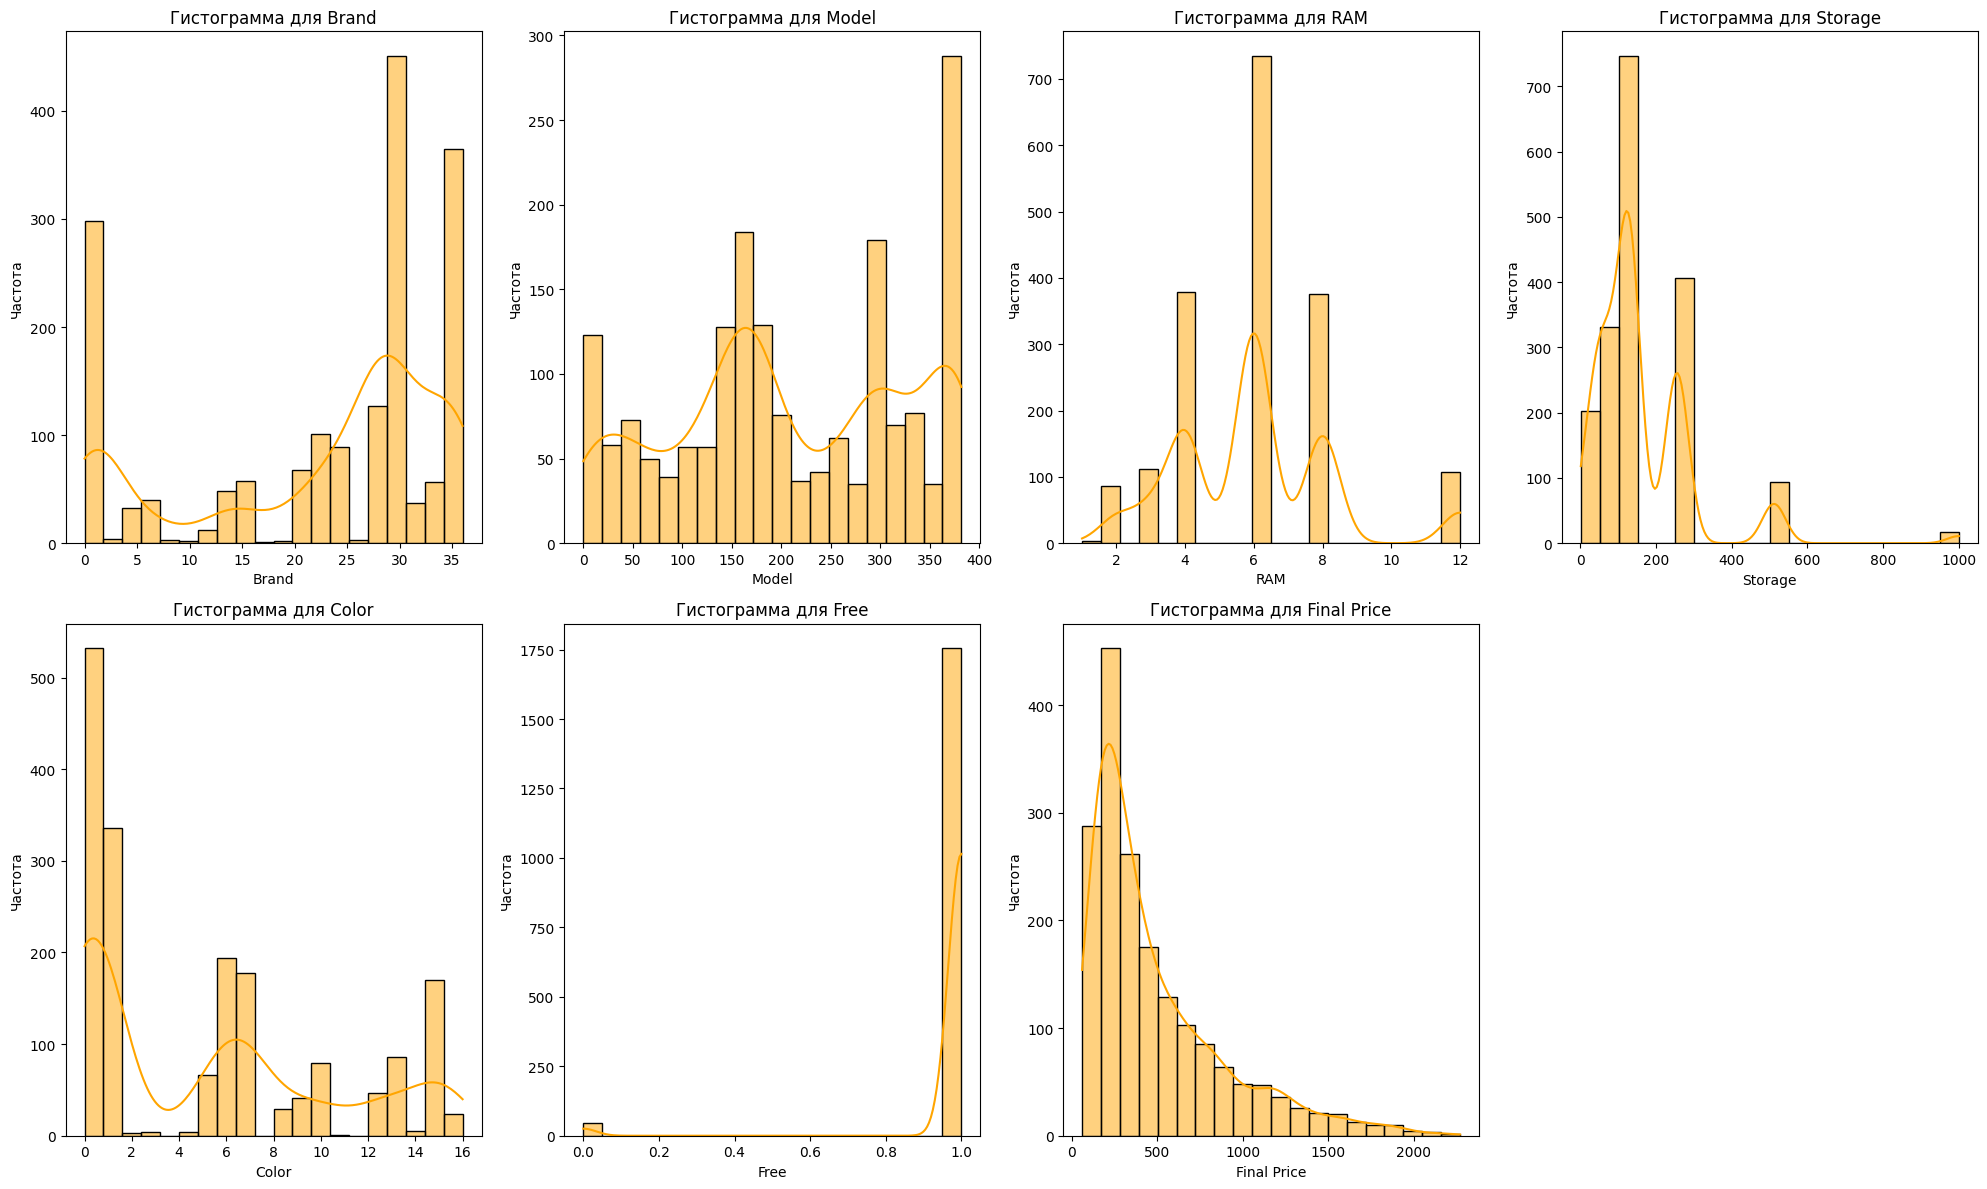

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Числовые столбцы для визуализации
numerical_columns = df_optimized.select_dtypes(include=['number']).columns

# Устанавливаем количество столбцов для графиков
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Количество строк для графиков

# Создание графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Построение гистограмм с KDE для числовых столбцов
for idx, col in enumerate(numerical_columns):
    sns.histplot(df_optimized[col], kde=True, ax=axes[idx], color='orange', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')

# Удаляем пустые оси, если их больше, чем нужных
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Настройка макета для красивого отображения
plt.tight_layout()

# Показать графики
plt.show()


Посмотрим на наличие выбросов

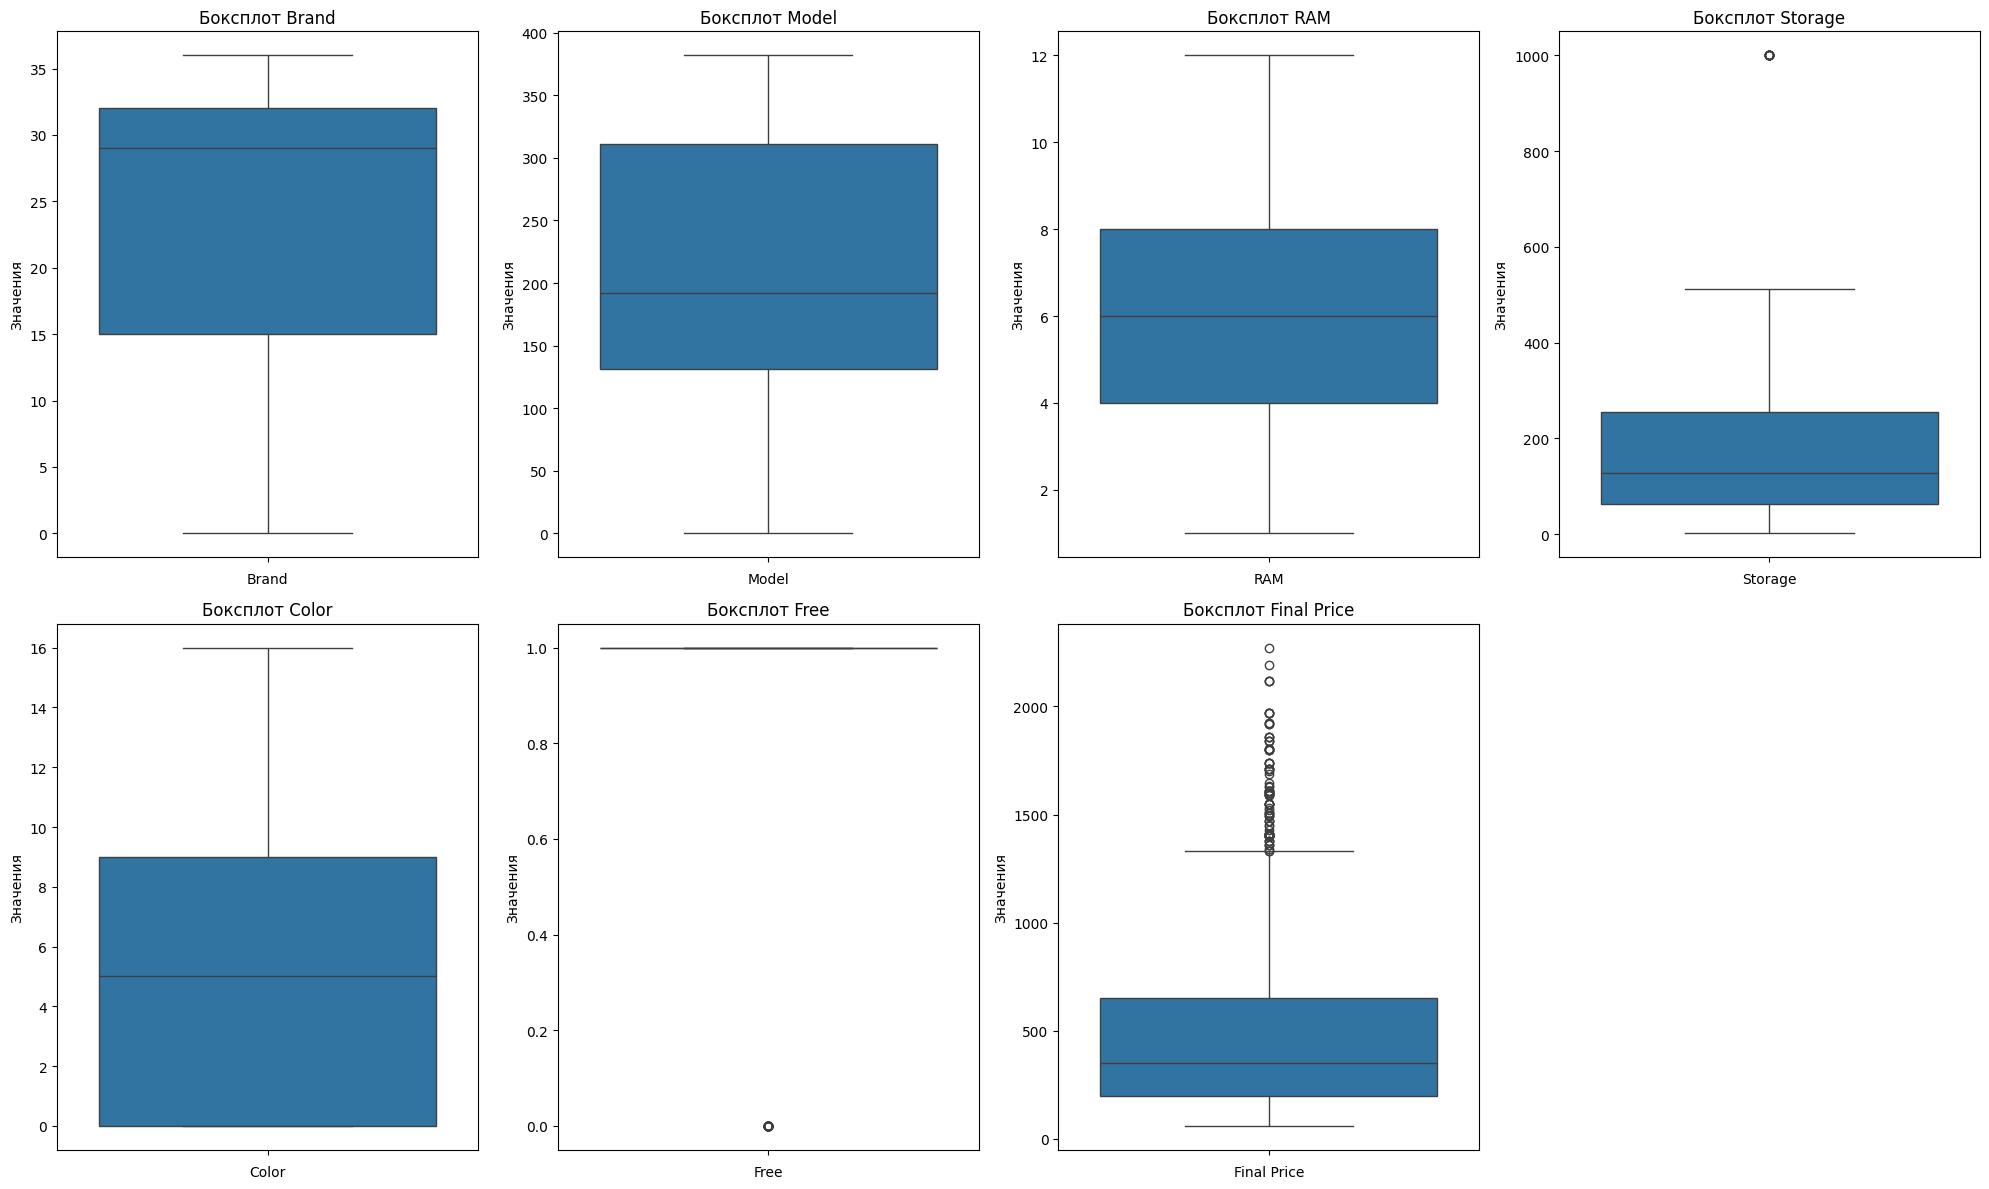

In [33]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Числовые столбцы для визуализации
numerical_columns = df_optimized.select_dtypes(include=['number']).columns

for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=df_optimized[col], ax=axes[idx])
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Видим выбросы в Storage, Final Price (Видно было по смещённому распределению) и Free просто имеют бинарные данные так что так интересно отрисовались

Посмотрим насколько данные коррелируют между собой чтобы предположить какие данные можно удалить из-за отсутствия информации

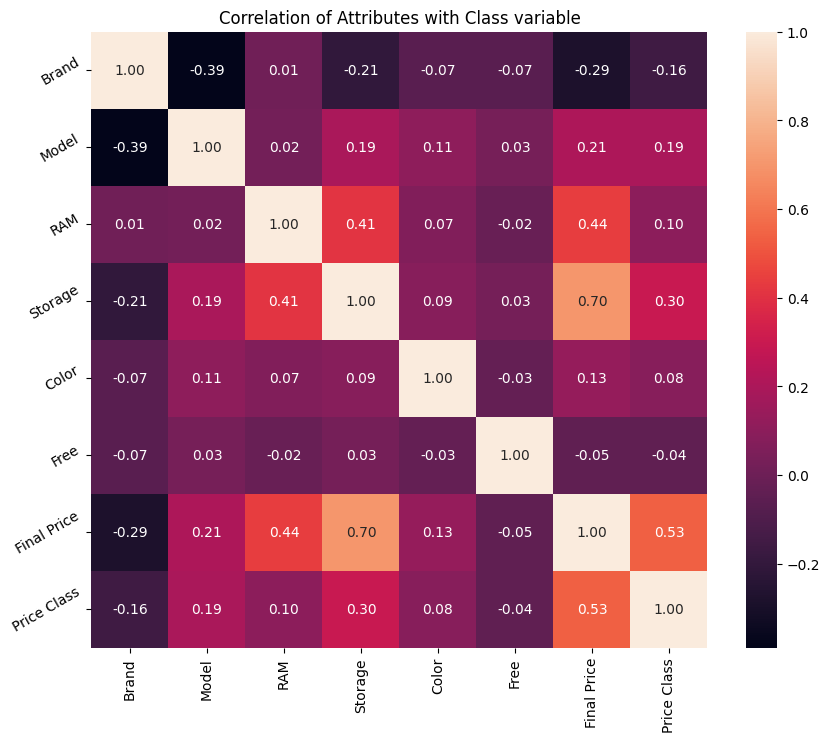

In [34]:
df_temp = df_optimized.copy()

# Преобразуем категориальный столбец 'Price Class' в числовой (например, через Label Encoding)
label_encoder = LabelEncoder()

df_temp['Price Class'] = label_encoder.fit_transform(df_temp['Price Class'])

# Вычисляем матрицу корреляций
correlation = df_temp.corr()

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Из данной корреляционной матрицы видим:

с Price Class хорошо коррелируют Storage, Model, RAM, отрицательно коррелирует Brand и вообще не вносят информации Color, Free

с Final Price замечательно коррелирует Storage, хорошо коррелируют Ram, Model, отрицательно коррелирует Brand и не вносят никакой информации Color, Free

Storage и Ram хорошо коррелируют друг с другом

Попробуем избавиться от столбцов Color, Free, добавить новую фичу: Storage_per_RAM, дропнув RAM, так как он имеет меньшую корреляцию. Также попробуем заменить labelEncoding в Brand на FrequencyEncoding и посмотрим будет ли это иметь положительный эффект

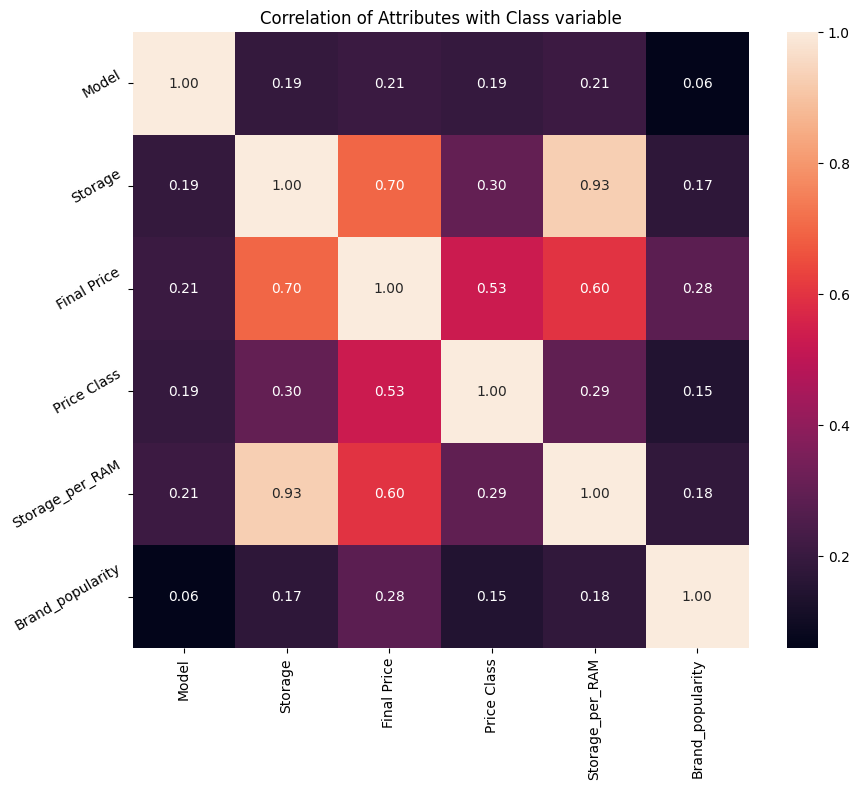

In [35]:
# Создание нового признака: отношение Storage к RAM
df_temp['Storage_per_RAM'] = df_temp['Storage'] / df_temp['RAM']

# Добавление перекодированного признака: популярность брендов
brand_popularity = df_temp['Brand'].value_counts(normalize=True)
df_temp['Brand_popularity'] = df_temp['Brand'].map(brand_popularity)

# Удаляем столбцы Color, Free, RAM, Brand
df_temp = df_temp.drop(columns=['Color', 'Free', 'RAM', 'Brand'])

# Вычисляем матрицу корреляций
correlation = df_temp.corr()

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Можем увидеть, что Storage_per_RAM имеет большую корреляцию как с Final Price, так и с Price Class по сравнению с RAM

Brand_popularity имеет положительную корреляцию с Final Price, Price Class

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [36]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Final Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

KNeighborsClassifier(n_neighbors=3, weights='distance')

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [37]:
# Оценка модели классификации
y_pred_train_cls_optimized = knn_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = knn_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7555555555555555
Balanced accuracy = 0.7569860209562094

Оценка на тренировочной выборке:
Accuracy = 0.8874218207088256
Balanced accuracy = 0.8870986979266592


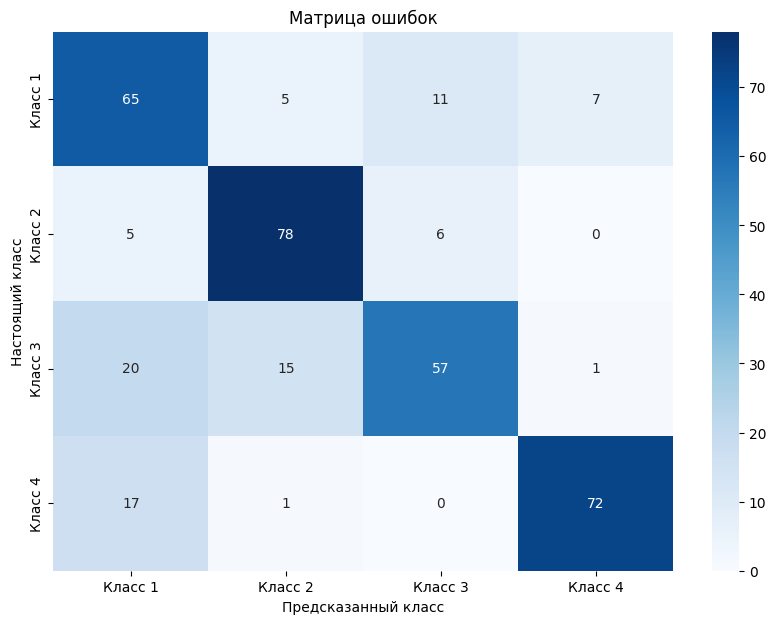

In [38]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 12,5% точнее, а на тренировочной примерно на 10%

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло KNN обучиться правильнее и с большей точностью предсказывать ценовой класс телефона

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [39]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Final Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Final Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

KNeighborsRegressor(n_neighbors=3)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [40]:
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Функция для расчета RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_test_pred_reg_optimized = knn_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = knn_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 110.8991
MAPE = 25.2993%
MSE = 36710.2780
RMSE = 191.5993

Оценка на тренировочной выборке:
MAE = 84.1195
MAPE = 19.7653%
MSE = 19516.5522
RMSE = 139.7017


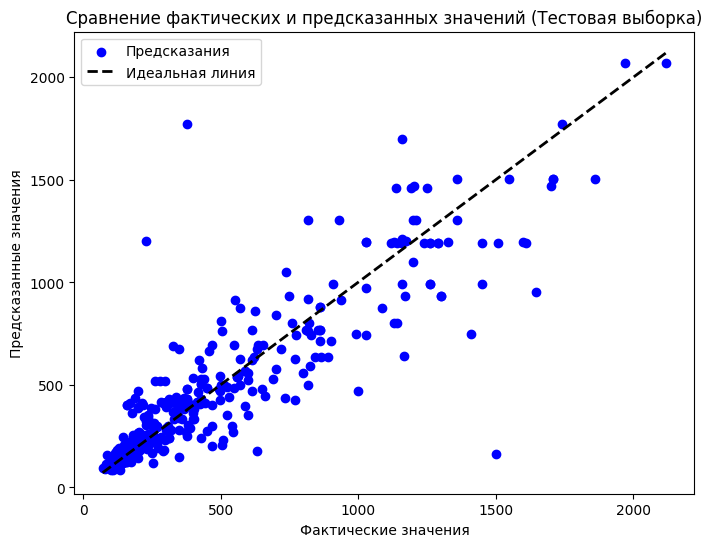

In [41]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE (Средняя абсолютная ошибка) уменьшилась с 158.59 до 110.90, что означает, что в среднем ошибки предсказания стали меньше.

MAPE (Средняя абсолютная процентная ошибка) снизилась с 38.13% до 25.30%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE (Среднеквадратичная ошибка) уменьшилась с 60848.79 до 36710.28, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE (Корень из MSE) снизился с 246.68 до 191.60, что также подтверждает снижение ошибок, особенно в больших значениях.

В общем, модель на улучшенном бейзлайне показала явное увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что стало меньше выбросов и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло KNN обучиться правильнее и с большей точностью предсказывать стоимость телефона

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [42]:
from collections import Counter

# Функция KNN для классификации и регрессии
def KNN(X_train, X_test, y_train, y_test=None, k=3, p=2, task='regression'):
    """
    Универсальная реализация KNN для классификации и регрессии.

    Parameters:
    X_train (ndarray): Массив обучающих данных.
    X_test (ndarray): Массив тестовых данных.
    y_train (ndarray): Массив целевых значений для обучающих данных.
    y_test (ndarray, optional): Массив целевых значений для тестовых данных.
    k (int): Количество ближайших соседей.
    p (int): Порядок нормы для вычисления расстояний.
    task (str): 'classification' или 'regression'.

    Returns:
    y_pred (ndarray): Предсказания для тестовых данных.
    metrics (dict): Метрики точности (если предоставлены y_test).
    """
    # Преобразование данных в numpy массивы
    X_train, X_test, y_train = map(np.array, (X_train, X_test, y_train))

    # Вычисляем расстояния от каждого тестового примера до всех обучающих
    distances = np.linalg.norm(X_test[:, np.newaxis] - X_train, axis=2, ord=p)

    # Для каждого тестового примера выбираем индексы k ближайших соседей
    nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]

    # Получаем значения y_train для ближайших соседей
    nearest_neighbors_values = y_train[nearest_neighbors_indices]

    # Классификация или регрессия
    if task == 'classification':
        # Голосуем за самый популярный класс
        y_pred = np.array([
            Counter(neighbors).most_common(1)[0][0] for neighbors in nearest_neighbors_values
        ])
    elif task == 'regression':
        # Берем среднее значение
        y_pred = np.mean(nearest_neighbors_values, axis=1)
    else:
        raise ValueError("task должен быть 'classification' или 'regression'.")

    return y_pred

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [43]:
y_pred_base = KNN(X_train_cls_scaled_base, X_test_cls_scaled_base,
             y_train_cls_base, y_test_cls_base, k=3, p=2, task='classification')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [44]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6483516483516484
Balanced accuracy = 0.641714235377026


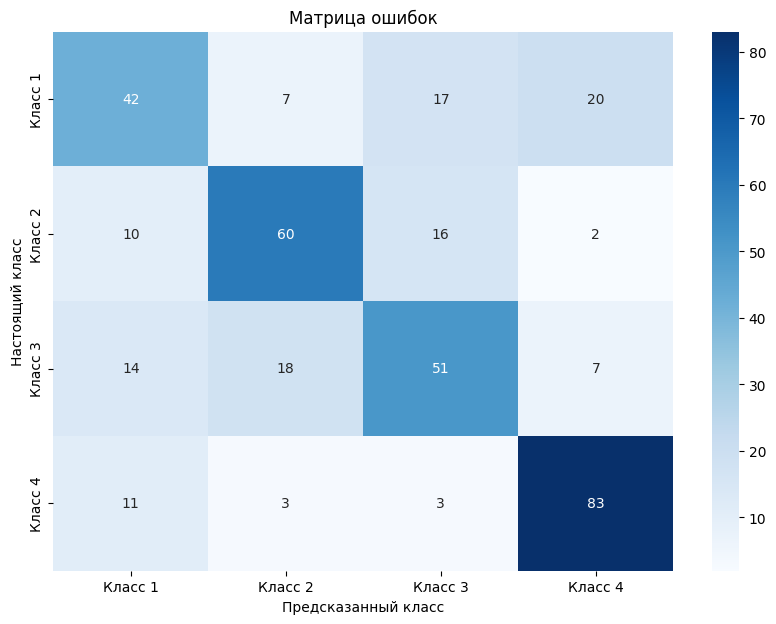

In [45]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.015 выше, я предполагаю что это из-за того что по разному выбирается класс который мы выбираем, когда при нахождении k соседей мы получили несколько лидирущих классов с одинаковым количеством точек в них.

Класс 1 стал на 6 раз реже угадываться правильно, в то время как остальные классы повысили частоту правильный ответов на 3, 4, 6 соответственно.

**e.	Сделать выводы**

Моя имплементацияя KNN классификации работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [46]:
y_pred_optimized = KNN(X_train_cls_scaled_optimized, X_test_cls_scaled_optimized,
             y_train_cls_optimized, y_test_cls_optimized, k=3, p=2, task='classification')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [47]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.7222222222222222
Balanced accuracy = 0.7230187659487225


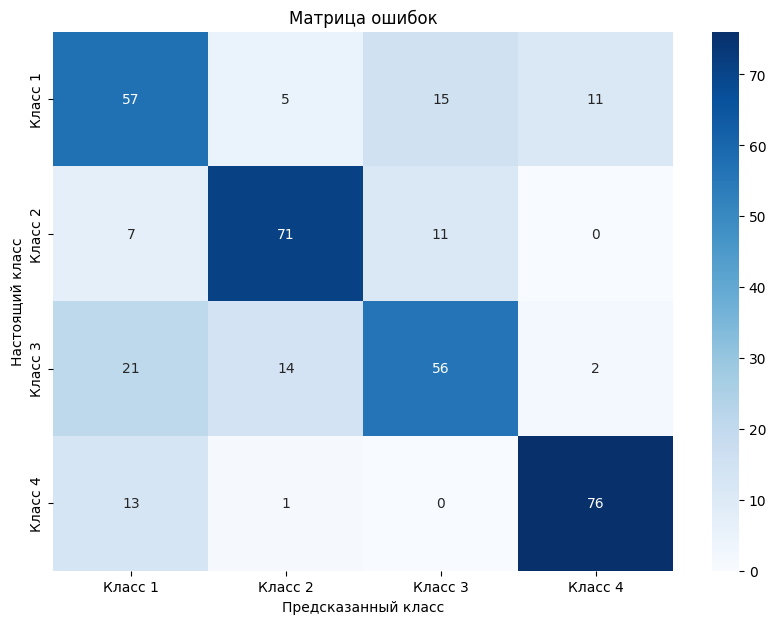

In [48]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.03 хуже, я предполагаю что это связано с тем же: что по разному выбирается класс который мы выбираем, когда при нахождении k соседей мы получили несколько лидирущх классов с одинаковым количеством точек в них.

Классы 1, 2, 3 стали на 8, 7, 1 раз соответвенно реже угадываться правильно, в то время как 4 класс повысил частоту правильных ответов на 4.

**j.	Сделать выводы**

Моя имплементацияя KNN классификации работает примерно с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [49]:
y_pred_base = KNN(X_train_reg_scaled_base, X_test_reg_scaled_base,
             y_train_reg_base, y_test_reg_base, k=3, p=2, task='regression')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [50]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 161.4345
MAPE = 38.5132%
MSE = 63107.2537
RMSE = 251.2116


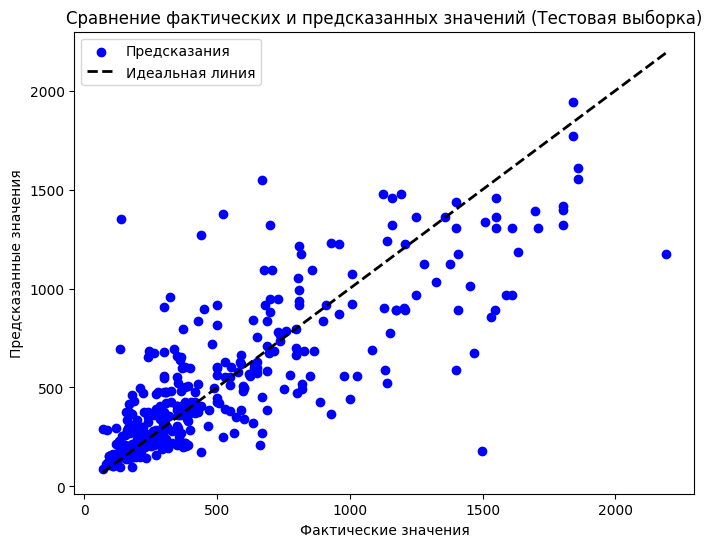

In [51]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Хоть каждая из метрик немного ухудшилась

MAE ~на 3  
MAPE ~на 0.38%  
MSE ~на 2370  
RMSE ~на 5  

В целом ухудшения не произошло, как мы можем видеть кучность точек на диаграммах рассеивания не изменилась, не добавилось новых выбросов, просто изменились расположения некоторых отдельных точек

**e.	Сделать выводы**

Моя имплементацияя KNN регрессии работает примерно с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [52]:
y_pred_optimized = KNN(X_train_reg_scaled_optimized, X_test_reg_scaled_optimized,
             y_train_reg_optimized, y_test_reg_optimized, k=3, p=2, task='regression')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [53]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 109.3256
MAPE = 25.2951%
MSE = 36982.5351
RMSE = 192.3084


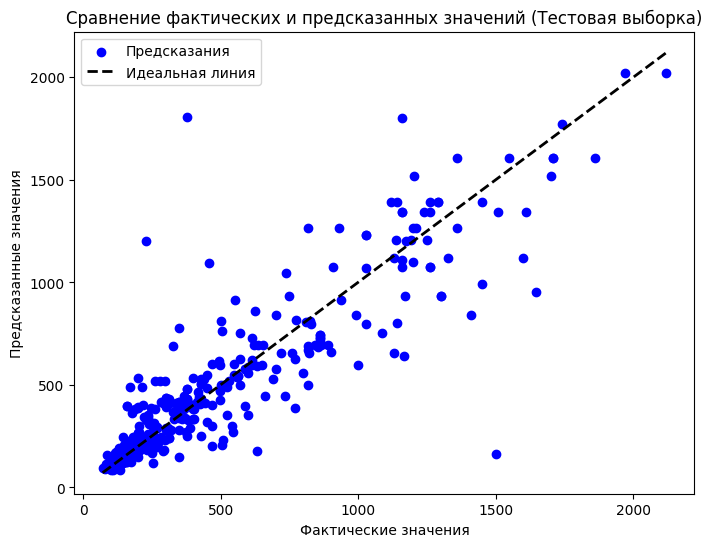

In [54]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Изменения метрик

MAE улучшилась ~на 1.5  
MAPE улучшилась ~на 0.04%  
MSE ухудшилась ~на 272  
RMSE ухудшилась ~на 1  

Можно заключить что моя имплементация работает с той же точностью, так как средняя ошибка только улучшилась, а квадратическая ошибка немного ухудшилась, что означает что точки расположены ближе к идеальному предсказанию, но есть некоторые единичные ухудшения. Как мы можем видеть кучность точек на диаграммах рассеивания стала чуточку ближе к идеальной линии, но появились небольшие единичные отклонения

**j.	Сделать выводы**

Моя имплементацияя KNN регрессии работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

# **Лабораторная работа 2**

# **Проведение исследований с логистической и линейной регрессией**

## **2. Создание бейзлайна и оценка качества**

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.multiclass import OneVsRestClassifier

In [56]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [57]:
# Разделение данных для классификации

# Странно обучать как по уже известным классам найти тот же самый класс
# Так и как по уже известной стоимости найти класс определённый через стоимость
X_classification_base = df_base.drop(["Final Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


# scaler = StandardScaler() # Стандартизация данных
scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)
# X_train_cls_scaled_base = X_train_cls_base
# X_test_cls_scaled_base = X_test_cls_base

# Обучение модели классификации
# logreg_classifier = LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear')  # Выбор многоклассового подхода (one-vs-rest) # FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead.
logreg_classifier = LogisticRegression(max_iter=10000, solver='liblinear')
ovr_classifier = OneVsRestClassifier(logreg_classifier)
ovr_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                 solver='liblinear'))

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [58]:
y_test_pred_cls_base = ovr_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = ovr_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.521978021978022
Balanced accuracy = 0.5180863871270848

Оценка на тренировочной выборке:
Accuracy = 0.5316804407713499
Balanced accuracy = 0.5325440723416179


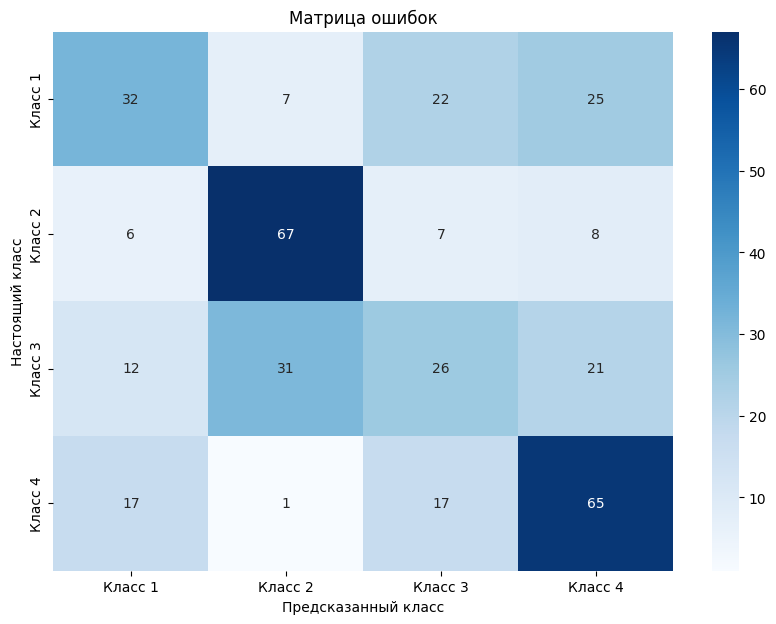

In [59]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 52.19%, что не является выдающимся результатом, но и не ужасным при предсказании одного из 4 классов.

In [60]:
# Проверяем нулевую оценку точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2747


До тех пор, пока точность модели будеть хотя бы в полтора раза точнее нулевого показателя точности (когда модель научилась всегда выбирать самый часто встречаемый класс и больше никого), что мы и видим до сих пор, я буду считать, что модель справляется хорошо с предсказанием меток ценовых классов

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [61]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Final Price', 'Price Class'], axis=1)
y_regression_base = df_base["Final Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

LinearRegression()

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [62]:
y_test_pred_reg_base = linear_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = linear_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 210.3182
MAPE = 51.8933%
MSE = 88101.6087
RMSE = 296.8192

Оценка на тренировочной выборке:
MAE = 186.5243
MAPE = 48.5784%
MSE = 68102.7793
RMSE = 260.9651


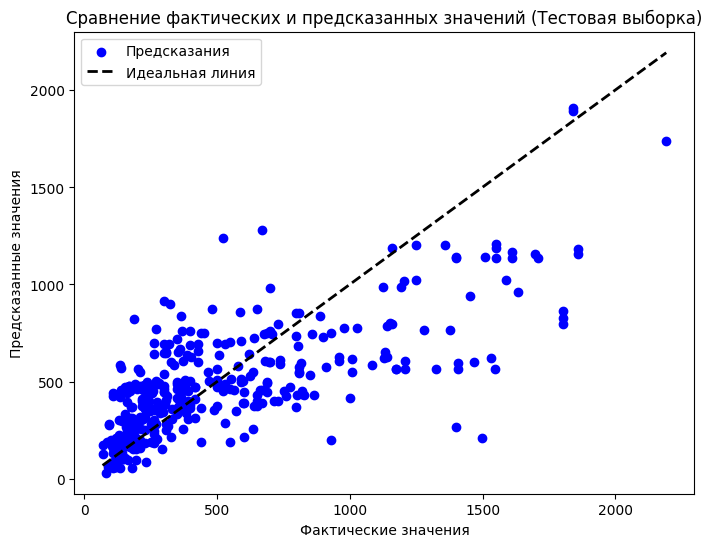

In [63]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

Как мы можем вспомнить, есть выбросы в атрибуте 'Final Price', то есть основное распределение цен сосредоточено в районе 300 условных единиц, а весь диапазон от 60 до ~2200. Линейные модели чувствительны к выбросам и как мы можем видеть в окрестности идеальной линии оказались только предсказания в диапазоне от 60 до ~750, дальше уже просто занижение стоимости шло. Результат не совсем ужасный, но не идёт ни в какое сравнение с KNN, хотя он тоже считается простой моделью.

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

Данные раздел препроцессингом, визуализацией данных и формированием новых признаков никак не будет отличаться от того что было в 1 лабораторной, так что я не буду повторяться

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [64]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Final Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)
# X_train_cls_scaled_optimized  = X_train_cls_optimized
# X_test_cls_scaled_optimized  = X_test_cls_optimized

# Обучение модели классификации
logreg_classifier = LogisticRegression(max_iter=10000, solver='liblinear')
ovr_classifier = OneVsRestClassifier(logreg_classifier)
ovr_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                 solver='liblinear'))

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [65]:
# Оценка модели классификации
y_pred_train_cls_optimized = ovr_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = ovr_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.525
Balanced accuracy = 0.5284846242416921

Оценка на тренировочной выборке:
Accuracy = 0.5677553856845031
Balanced accuracy = 0.5656853152219792


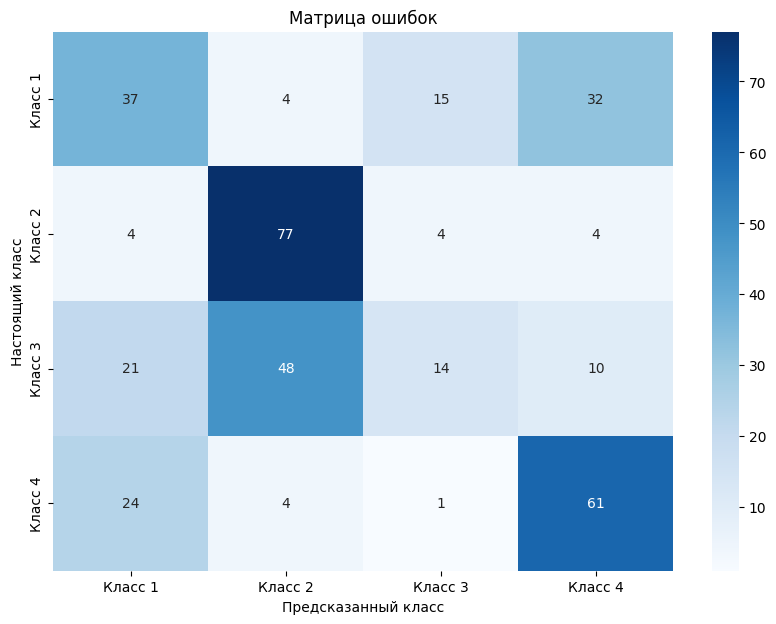

In [66]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 0,3% точнее, а на тренировочной примерно на 1,5%

**g.	Сделать выводы**

В данном случае самым основным улучшением стало изменение нормализации на стандартизацию, препроцессинг данных или добавление новых фичей к сильным изменениям не приводили, так как линейные модели не учитывают взаимодействие между признаками (как в моём случае было деление) и вполне вероятно, что зависимость между признаками и целевой переменной нелинейна, что приводит к таким низким показателям логистической регрессии

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [67]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Final Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Final Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

LinearRegression()

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [68]:
y_test_pred_reg_optimized = linear_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = linear_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 202.4122
MAPE = 53.6364%
MSE = 82620.3692
RMSE = 287.4376

Оценка на тренировочной выборке:
MAE = 193.9455
MAPE = 52.2952%
MSE = 69751.2042
RMSE = 264.1045


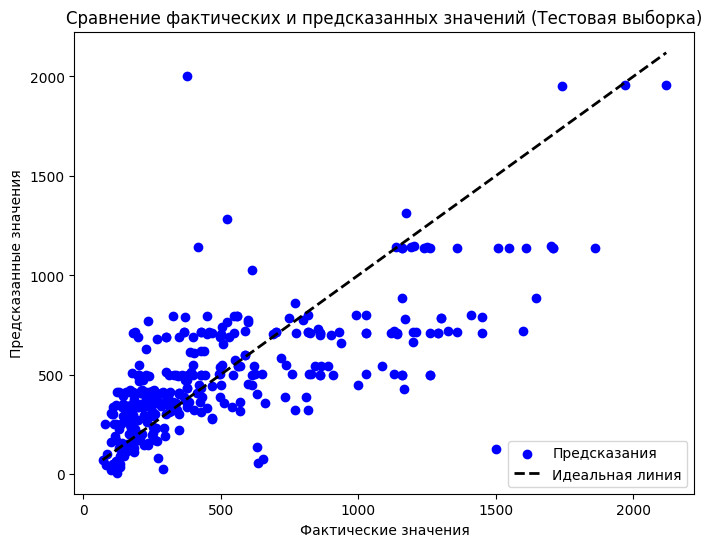

In [69]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE (Средняя абсолютная ошибка) уменьшилась с 210.32 до 202.41, что означает, что в среднем ошибки предсказания стали меньше.

MAPE (Средняя абсолютная процентная ошибка) увеличилась с 51.89% до 53.63%, что говорит о том, что модель стала предсказывать значения с большей относительной ошибкой. Уменьшение MAE, но увеличение MAPE говорит о том что данные с большими значениями предсказывались с большей точностью, а данные с меньшим значением с меньшей, что из-за обилия маленьких значений могло привели к деградации MAPE, есть ещё 2 вариант, что значения с большим отклонением стали в общей массе ближе к идеалу, но количество выбросов практически не изменилось и сами выбросы стали давать большую ошибку.

MSE (Среднеквадратичная ошибка) уменьшилась с 88101.61 до 82620.36, что подтверждает тенденцию уменьшения величины крупных ошибок.

RMSE (Корень из MSE) снизился с 296.81 до 264.10, что также подтверждает снижение ошибок в больших значениях.

В общем, модель на улучшенном бейзлайне показала небольшое увеличение точности предсказаний и графики рассеиваний указывают на то что стало чуточку меньше выбросов, но они стали делать большую ошибку и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

В данном случае самым основным улучшением стало изменение нормализации на стандартизацию, препроцессинг данных или добавление новых фичей к сильным изменениям не приводили, так как линейные модели не учитывают взаимодействие между признаками (как в моём случае было деление) и вполне вероятно, что зависимость между признаками и целевой переменной нелинейна, что приводит к таким низким показателям линейной регрессии

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [70]:
import numpy as np

# Функция для обучения и предсказания (классификация или регрессия)
def custom_regression(X_train, y_train, X_test, task='classification', learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    if task == 'classification':
        # Логистическая регрессия для многоклассовой классификации (One-vs-Rest)
        return logistic_regression_multiclass(X_train, y_train, X_test, learning_rate, n_iterations, tolerance)
    elif task == 'regression':
        # Линейная регрессия
        return linear_regression(X_train, y_train, X_test, learning_rate, n_iterations, tolerance)
    else:
        raise ValueError("Task must be 'classification' or 'regression'")

# Многоклассовая логистическая регрессия (One-vs-Rest)
def logistic_regression_multiclass(X_train, y_train, X_test, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    n_samples, n_features = X_train.shape
    n_classes = len(np.unique(y_train))

    # Преобразуем метки классов в числовые значения
    class_map = {label: idx for idx, label in enumerate(np.unique(y_train))}
    y_train_num = np.array([class_map[label] for label in y_train])

    # Инициализация весов для каждого класса
    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)

    # Градиентный спуск для каждого класса (One-vs-Rest)
    for _ in range(n_iterations):
        # Вычисляем линейную комбинацию признаков
        model = np.dot(X_train, weights) + bias
        predictions = softmax(model)

        # Для каждого класса вычисляем градиенты
        dw = (1 / n_samples) * np.dot(X_train.T, (predictions - one_hot_encode(y_train_num, n_classes)))
        db = (1 / n_samples) * np.sum(predictions - one_hot_encode(y_train_num, n_classes), axis=0)

        # Обновляем параметры
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Проверка на сходимость
        if np.linalg.norm(dw) < tolerance and np.max(np.abs(db)) < tolerance:
            break

    # Предсказания для теста
    model_test = np.dot(X_test, weights) + bias
    y_pred_prob = softmax(model_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)

    # Преобразуем обратно в исходные метки классов
    reverse_class_map = {v: k for k, v in class_map.items()}
    y_pred_labels = [reverse_class_map[label] for label in y_pred_classes]

    return np.array(y_pred_labels)

# Функция softmax для многоклассовой классификации
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Для стабильности чисел
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Функция для one-hot кодирования меток классов
def one_hot_encode(y, n_classes):
    return np.eye(n_classes)[y]

# Линейная регрессия
def linear_regression(X_train, y_train, X_test, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0

    # Градиентный спуск
    for _ in range(n_iterations):
        model = np.dot(X_train, weights) + bias
        predictions = model

        # Вычисляем градиенты
        dw = (2 / n_samples) * np.dot(X_train.T, (predictions - y_train))
        db = (2 / n_samples) * np.sum(predictions - y_train)

        # Обновляем параметры
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Проверка на сходимость
        if np.linalg.norm(dw) < tolerance and np.abs(db) < tolerance:
            break

    # Предсказания для теста
    model_test = np.dot(X_test, weights) + bias
    return model_test


#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [87]:
y_pred_base = custom_regression(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, task='classification', learning_rate=0.15, n_iterations=10000)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [88]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.521978021978022
Balanced accuracy = 0.5205476274371623


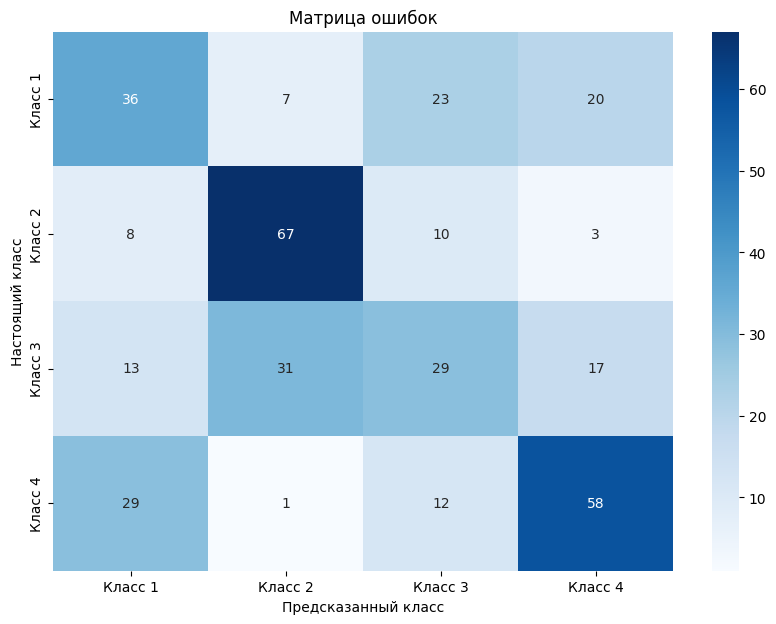

In [89]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

accuracy, balanced accuracy у моей имплементации отличаются максимум на 1e-4 от метрик модели sklearn, на что можно закрыть глаза и считать, что у них идентичная точность

Классы 1, 3 стали на 4, 3 раза соответсвенно чаще угадываться правильно, в то время как класс 4 потерял 7 правильных предсказаний, а 2 класс остался с тем же количеством.

**e.	Сделать выводы**

Моя имплементацияя логистической регрессии работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [92]:
y_pred_optimized = custom_regression(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, task='classification', learning_rate=0.01, n_iterations=10000)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [93]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.5305555555555556
Balanced accuracy = 0.5316848486679041


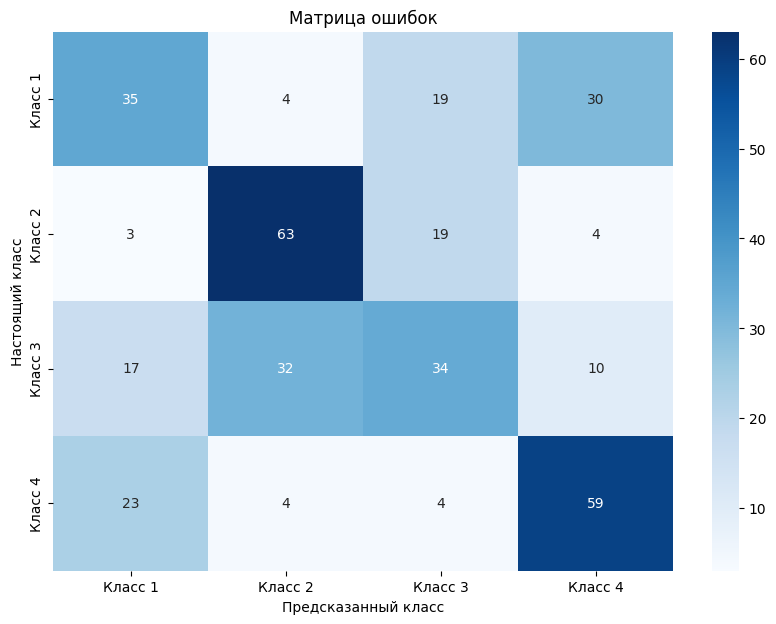

In [94]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.005 лучше, я предполагаю что это может быть связано с разницей в ограничение на количество итераций или различие в параметре learning_rate, но всё-таки не думаю что есть о чём сильно разглогольствовать смотря что в переводе на проценты улучшение всего ~ на 0.5%, что совершенно незначительно.

Классы 1, 2, 4 стали на 2, 14, 2 раз соответвенно реже угадываться правильно, в то время как 3 класс повысил частоту правильных ответов на 20. В следствие чего итоговая точность возрасла, так как 20 - 14 - 2 - 2 = 2 (прибавилось 2 правильных ответа)

**j.	Сделать выводы**

Моя имплементацияя логистической регрессии работает с той же точностью, что и реализация sklearn на улучшенном бейзлайне, что является показателем хорошо проделанной работы

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [77]:
y_pred_base = custom_regression(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, task='regression', learning_rate=0.01, n_iterations=1000)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [78]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 210.3184
MAPE = 51.8934%
MSE = 88101.7723
RMSE = 296.8194


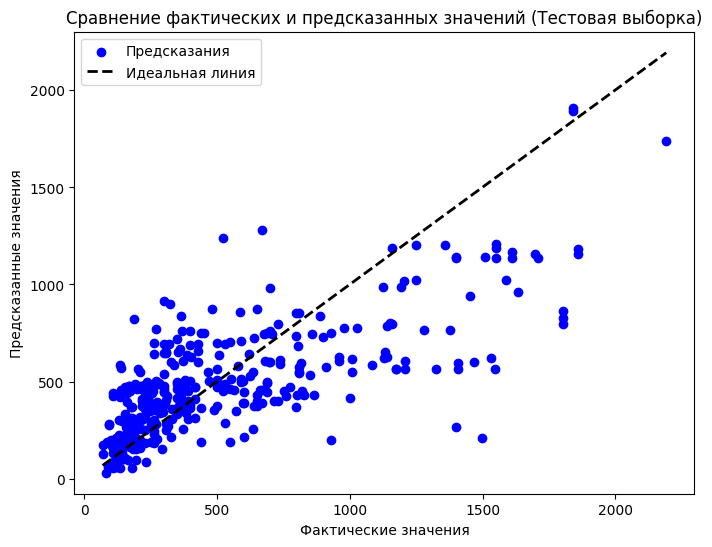

In [79]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Метрики остались на том же уровне (слево то что у моей реализации, справа то что у sklearn)

MAE: 210.3184  vs 210.3182  
MAPE: 51.8934% vs 51.8933%  
MSE: 88101.7723 vs 88101.6087  
RMSE: 296.8194 vs 296.8192  

Видимых различий в диаграммах рассеивания не наблюдается.

Только по метрикам можно утверждать, что произошло ухудшение, но оно настолько незначительно, что можно считать что имплементации идентичны по метрикам на данном наборе данных.

**e.	Сделать выводы**

Моя имплементацияя линейной регрессии работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [80]:
y_pred_optimized = custom_regression(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, task='regression', learning_rate=0.01, n_iterations=1000)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [81]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 203.6512
MAPE = 54.3687%
MSE = 83762.9024
RMSE = 289.4182


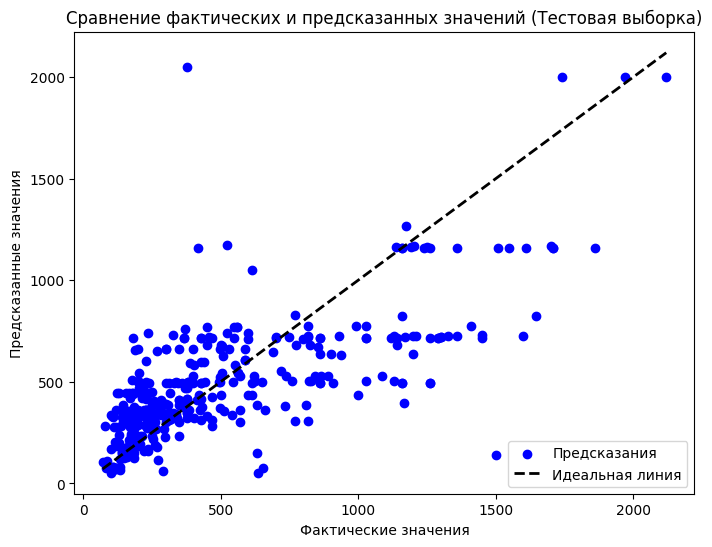

In [82]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Метрики остались на том же уровне (слево то что у моей реализации, справа то что у sklearn)

MAE: 203.6512  vs 202.4122
MAPE: 54.3687% vs 53.6364%
MSE: 83762.9024 vs 82620.3692
RMSE: 289.4182 vs 287.4376

В диаграммах рассеивания есть небольшие видимые изменения, но они связаны со смещением нескольких отдельных точек, в целом кучность точек не изменилось, не добавилось новых выбросов, так что я бы заключил что моя имплементация работает с практически такой же точностью как и реализация sklearn.

**j.	Сделать выводы**

Моя имплементацияя линейной работает с той же точностью, что и реализация sklearn на улучшенном бейзлайне, что является показателем хорошо проделанной работы

# **Лабораторная работа 3**

# **Проведение исследований с решающим деревом**

## **2. Создание бейзлайна и оценка качества**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [ ]:
# Разделение данных для классификации

# Странно обучать как по уже известным классам найти тот же самый класс
# Так и как по уже известной стоимости найти класс определённый через стоимость
X_classification_base = df_base.drop(["Final Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
dt_classifier = DecisionTreeClassifier(random_state=42)  # Можно добавить гиперпараметры, если необходимо
dt_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

DecisionTreeClassifier(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
y_test_pred_cls_base = dt_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = dt_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7005494505494505
Balanced accuracy = 0.6975924947145877

Оценка на тренировочной выборке:
Accuracy = 0.953168044077135
Balanced accuracy = 0.953046425642415


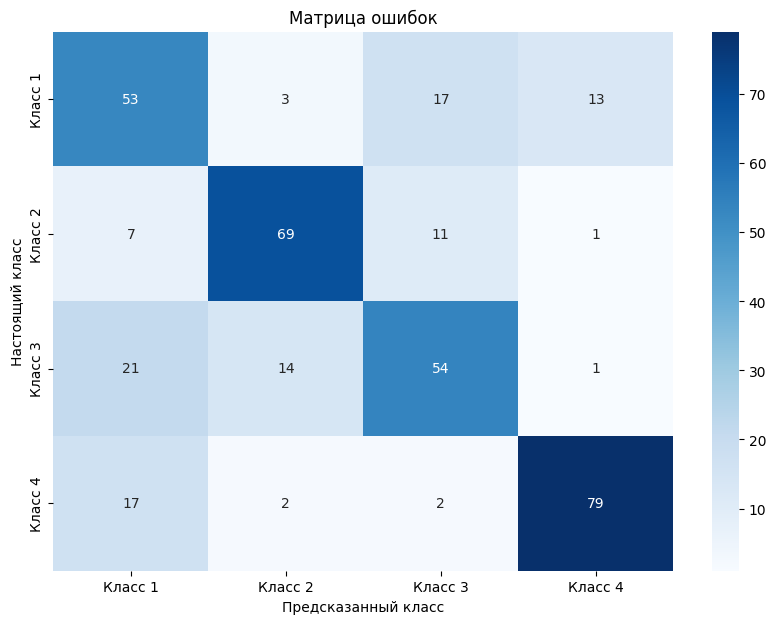

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 70.05%, что является не является выдающимся результатом, но и не ужасным при предсказании одного из 4 классов.

In [ ]:
# Проверяем нулевую оценку точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2747


Мы видим, что показатель точности нашей модели равен 0,7005, а нулевой показатель точности равен 0,2747. Таким образом, мы можем заключить, что наша модель решающего дерева хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [ ]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Final Price', 'Price Class'], axis=1)
y_regression_base = df_base["Final Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
dt_regressor = DecisionTreeRegressor(random_state=42)  # Можно добавить гиперпараметры, если необходимо
dt_regressor .fit(X_train_reg_scaled_base, y_train_reg_base)

DecisionTreeRegressor(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
y_test_pred_reg_base = dt_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = dt_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 136.6670
MAPE = 30.7884%
MSE = 48953.9908
RMSE = 221.2555

Оценка на тренировочной выборке:
MAE = 25.6615
MAPE = 4.8953%
MSE = 4039.8237
RMSE = 63.5596


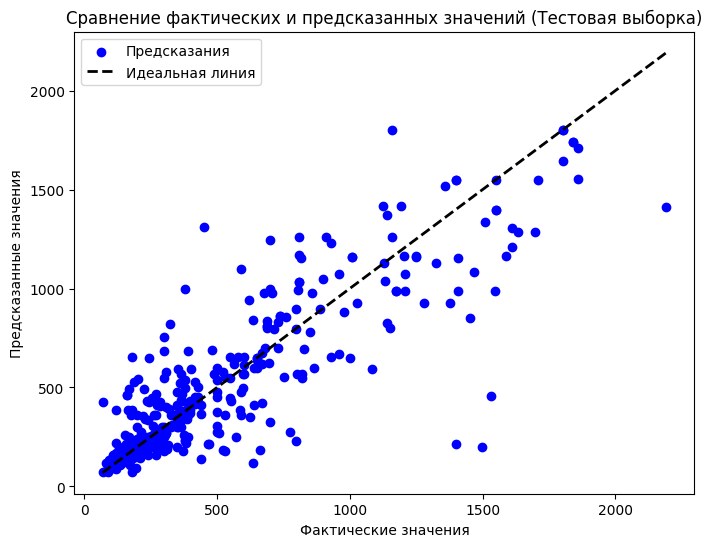

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

Важно заметить, что метрики, такие как MAPE (30.79%) на валидационной выборке и MAE (136.6670), совсем не высокие. Это значит, что модель, хоть и не идеальна, может быть вполне использована для задачи регресси на данном наборе данных

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

Данные раздел препроцессингом, визуализацией данных и формированием новых признаков никак не будет отличаться от того что было в 1 лабораторной, так что я не буду повторяться

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [ ]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Final Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации
dt_classifier = DecisionTreeClassifier(random_state=42)  # Можно добавить гиперпараметры, если необходимо
dt_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

DecisionTreeClassifier(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [ ]:
# Оценка модели классификации
y_pred_train_cls_optimized = dt_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = dt_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.75
Balanced accuracy = 0.7513306771960269

Оценка на тренировочной выборке:
Accuracy = 0.8943710910354413
Balanced accuracy = 0.8940130846859292


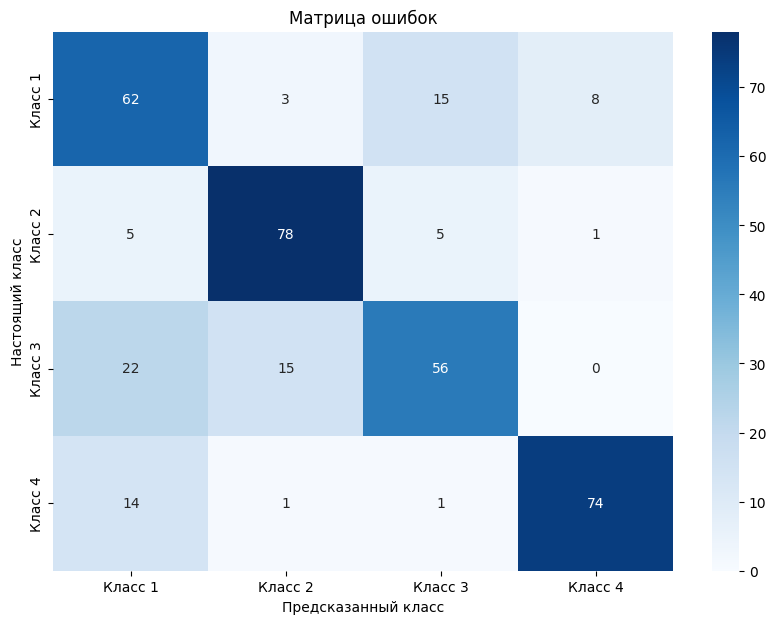

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 5% точнее, а на тренировочной хуже примерно на 6%, что свидетельствует об уменьшении переобучения модели. (Разница между тренировочной и тестовой на изначальном бейзлайне: ~25%, на улучшенном 14%)

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло дереву решений обучиться правильнее и с большей точностью предсказывать ценовой класс телефона

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [ ]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Final Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Final Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
dt_regressor = DecisionTreeRegressor(random_state=42)  # Можно добавить гиперпараметры, если необходимо
dt_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

DecisionTreeRegressor(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [ ]:
y_test_pred_reg_optimized = dt_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = dt_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 108.6093
MAPE = 24.4918%
MSE = 45594.4513
RMSE = 213.5286

Оценка на тренировочной выборке:
MAE = 57.4396
MAPE = 11.5210%
MSE = 12359.8734
RMSE = 111.1750


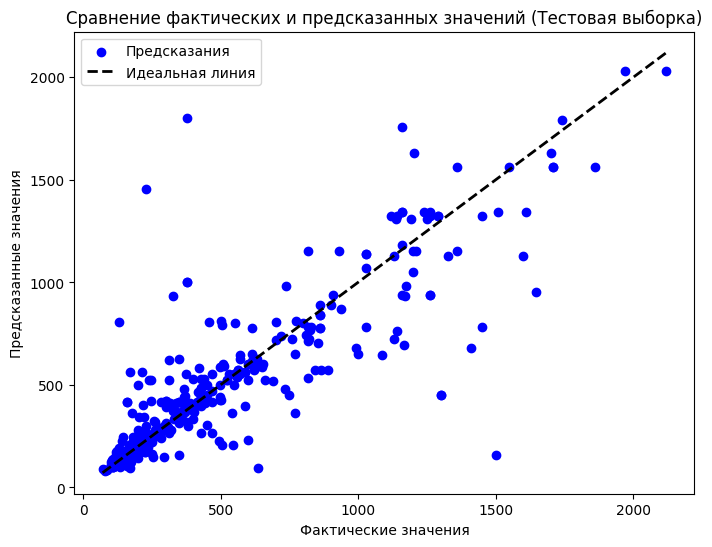

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE (Средняя абсолютная ошибка) уменьшилась с 136.67 до 108.61, что означает, что в среднем ошибки предсказания стали меньше.

MAPE (Средняя абсолютная процентная ошибка) снизилась с 30.79% до 24.49%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE (Среднеквадратичная ошибка) уменьшилась с 48953.99 до 45594.45, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE (Корень из MSE) снизился с 221.26 до 213.53, что также подтверждает снижение ошибок, особенно в больших значениях.

В общем, модель на улучшенном бейзлайне показала явное увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что точки в целом намного ближе к идеальной линии.

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло решающему дереву обучиться правильнее и с большей точностью предсказывать стоимость телефона

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [ ]:
import numpy as np
from collections import Counter

# Функция для вычисления энтропии (для классификации)
def entropy(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Функция для вычисления индекса Джини (для классификации)
def gini_impurity(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return 1 - np.sum(probabilities ** 2)

# Функция для вычисления MSE (для регрессии)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Функция для поиска наилучшего разбиения
def best_split(X, y, criterion='gini'):
    best_impurity = float('inf')
    best_split_info = None
    n_samples, n_features = X.shape

    for feature_idx in range(n_features):
        possible_splits = np.unique(X[:, feature_idx])

        for threshold in possible_splits:
            left_mask = X[:, feature_idx] <= threshold
            right_mask = ~left_mask
            y_left, y_right = y[left_mask], y[right_mask]

            # Пропускаем разбиение, если хотя бы одна из частей пуста
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            if criterion == 'gini':
                impurity = gini_impurity(y_left) * len(y_left) / n_samples + gini_impurity(y_right) * len(y_right) / n_samples
            elif criterion == 'entropy':
                impurity = entropy(y_left) * len(y_left) / n_samples + entropy(y_right) * len(y_right) / n_samples
            elif criterion == 'mse':  # Для задачи регрессии
                left_pred = np.mean(y_left)
                right_pred = np.mean(y_right)
                impurity = (np.mean((y_left - left_pred) ** 2) * len(y_left) + np.mean((y_right - right_pred) ** 2) * len(y_right)) / n_samples
            else:
                raise ValueError("Criterion must be 'gini', 'entropy' or 'mse'")

            if impurity < best_impurity:
                best_impurity = impurity
                best_split_info = (feature_idx, threshold)

    return best_split_info

# Рекурсивная функция для построения дерева
def build_tree(X, y, task='classification', max_depth=None, min_samples_split=2, depth=0, criterion='gini'):
    n_samples, n_features = X.shape
    unique_classes = np.unique(y)

    # Останавливаемся, если есть только один класс или достигли максимальной глубины
    if len(unique_classes) == 1 or (max_depth and depth == max_depth) or n_samples < min_samples_split:
        if task == 'classification':
            return Counter(y).most_common(1)[0][0]  # Возвращаем наиболее частый класс
        elif task == 'regression':
            return np.mean(y)  # Возвращаем среднее значение для регрессии

    # Ищем лучшее разбиение
    best_split_info = best_split(X, y, criterion)
    if not best_split_info:
        return np.mean(y) if task == 'regression' else Counter(y).most_common(1)[0][0]  # Если не удалось найти разбиение

    feature_idx, threshold = best_split_info
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]

    # Рекурсивно строим дерево
    left_node = build_tree(X_left, y_left, task, max_depth, min_samples_split, depth+1, criterion)
    right_node = build_tree(X_right, y_right, task, max_depth, min_samples_split, depth+1, criterion)

    return (feature_idx, threshold, left_node, right_node)

# Функция для предсказания с использованием дерева
def predict_tree(tree, X):
    if isinstance(tree, tuple):
        feature_idx, threshold, left_node, right_node = tree
        if X[feature_idx] <= threshold:
            return predict_tree(left_node, X)
        else:
            return predict_tree(right_node, X)
    else:
        return tree  # Это лист, возвращаем предсказание (класс или значение)

# Функция для обучения и предсказания с деревом решений
def decision_tree(X_train, y_train, X_test, task='classification', max_depth=None, min_samples_split=2, criterion='gini'):
    tree = build_tree(X_train, y_train, task, max_depth, min_samples_split, criterion=criterion)
    y_pred = np.array([predict_tree(tree, x) for x in X_test])
    return y_pred

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [ ]:
y_pred_base = decision_tree(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, task='classification', criterion='gini')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.7142857142857143
Balanced accuracy = 0.7107111815832746


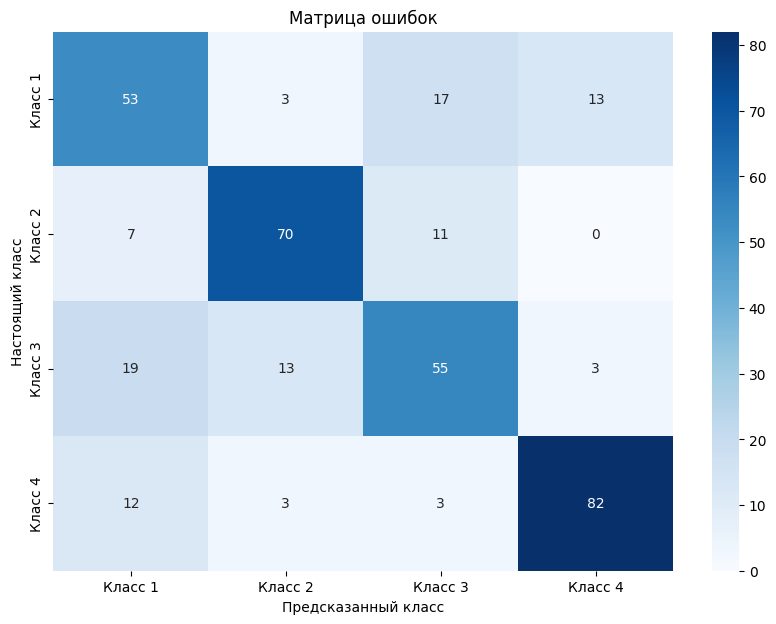

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.015 выше, я предполагаю что это может быть связано с различиями в леталях реализации самого алгоритма.

Классы 2, 3, 4 на 1, 1, 3 раза соответственно стали чаще угадываться правильно, в то время как количество правильно угаданных классов 1 не изменилось.

**e.	Сделать выводы**

Моя имплементацияя классификации с использованием решающего дерева работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [ ]:
y_pred_optimized = decision_tree(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, task='classification', criterion='gini')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.75
Balanced accuracy = 0.7505147524538608


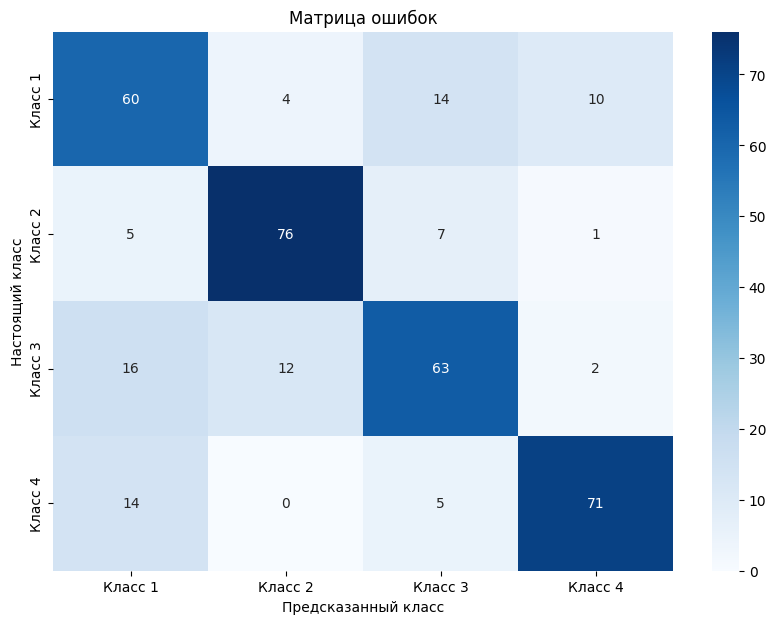

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

accuracy, balanced accuracy у моей имплементации отличаются максимум на 8 * 1e-4 от метрик модели sklearn, на что можно закрыть глаза и считать, что у них идентичная точность

Классы 1, 2, 4 стали на 2, 2, 3 раза соответсвенно реже угадываться правильно, в то время как класс 3 приобрёл 7 новых правильных предсказаний.

**j.	Сделать выводы**

Моя имплементацияя классификации с использованием решающего дерева работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [ ]:
y_pred_base = decision_tree(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, task='regression', criterion='mse')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 135.5487
MAPE = 29.9008%
MSE = 50048.8219
RMSE = 223.7159


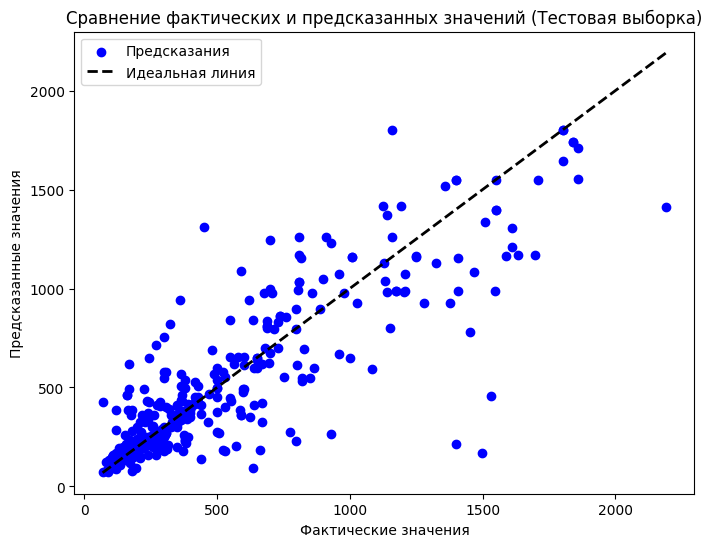

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Сравним метрики (слева будет то что у моей имплементации, справа то что было у sklearn)

MAE: 135.5487 vs 136.6670  
MAPE: 29.9008% vs 30.7884%  
MSE: 50048.8219 vs 48953.9908  
RMSE: 223.7159 vs 221.2555  

В целом произошли улучшения, как мы можем видеть кучность точек на диаграммах рассеивания не изменилась, добавился всего один новый выброс, который ухудшил метрики MSE и RMSE, так как MAE и MAPE при этом улучшились, хоть и нет видимых изменений, но скорее всего множество точек сконцентрированных у идеальной линии немного сдвинулись в её сторону.

**e.	Сделать выводы**

Моя имплементацияя регрессии с использованием решающего дерева работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [ ]:
y_pred_optimized = decision_tree(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, task='regression', criterion='mse')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 104.9442
MAPE = 22.7875%
MSE = 41188.5042
RMSE = 202.9495


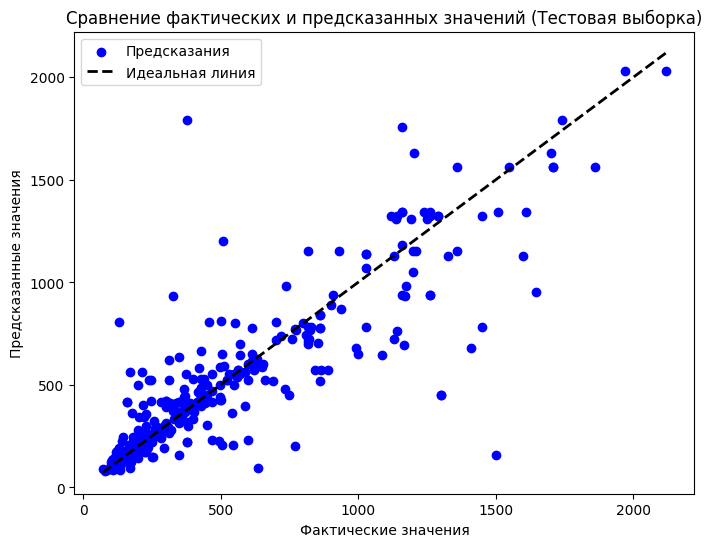

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Сравним метрики (слева будет то что у моей имплементации, справа то что было у sklearn)

MAE: 104.9442 vs 108.6093   
MAPE: 22.7875% vs 24.4918%  
MSE: 41188.5042 vs 45594.4513   
RMSE: 202.9495 vs 213.5286   

Все метрики улучшились. Если посмотрим на диаграммы рассеивания, можем заметить что мы смогли избавиться от некоторых выбросов и часть точек сместилась в сторону идеальной линии.

**j.	Сделать выводы**

Моя имплементацияя регрессии с применением решающего дерева работает с той же точностью, что и реализация sklearn при улучшенном бейзлайне, что является показателем хорошо проделанной работы

# **Лабораторная работа 4**

# **Проведение исследований со случайным лесом**

## **2. Создание бейзлайна и оценка качества**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [ ]:
# Разделение данных для классификации

# Странно обучать как по уже известным классам найти тот же самый класс
# Так и как по уже известной стоимости найти класс определённый через стоимость
X_classification_base = df_base.drop(["Final Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
rf_classifier = RandomForestClassifier(random_state=42)  # Можно добавить гиперпараметры, если необходимо
rf_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

RandomForestClassifier(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
y_test_pred_cls_base = rf_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = rf_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7060439560439561
Balanced accuracy = 0.7025129198966408

Оценка на тренировочной выборке:
Accuracy = 0.953168044077135
Balanced accuracy = 0.9532977978159604


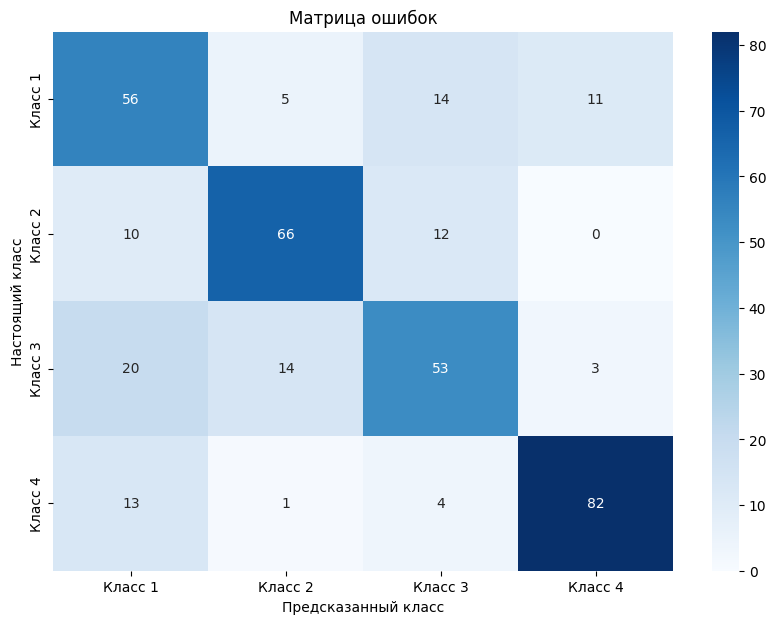

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 70.60%, что является хорошим результатом при предсказании одного из 4 классов.

In [ ]:
# Проверяем нулевую оценку точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2747


Мы видим, что показатель точности нашей модели равен 0,7060, а нулевой показатель точности равен 0,2747. Таким образом, мы можем заключить, что наша модель логистической регрессии хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [ ]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Final Price', 'Price Class'], axis=1)
y_regression_base = df_base["Final Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
rf_regressor = RandomForestRegressor(random_state=42)  # Можно добавить гиперпараметры, если необходимо
rf_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

RandomForestRegressor(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
y_test_pred_reg_base = rf_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = rf_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 122.9956
MAPE = 26.8666%
MSE = 38871.4932
RMSE = 197.1585

Оценка на тренировочной выборке:
MAE = 49.3243
MAPE = 11.7776%
MSE = 6595.4097
RMSE = 81.2121


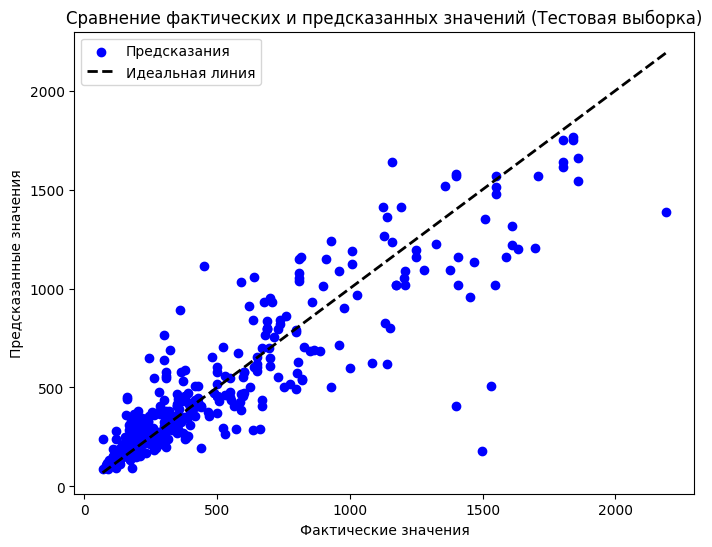

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

Важно заметить, что метрики, такие как MAPE (26.87%) на валидационной выборке и MAE (122.99), достаточно низкие. Это значит, что модель, хоть и не идеальна, может быть вполне использована для задачи определения примерной цены телефона

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

Данные раздел препроцессингом, визуализацией данных и формированием новых признаков никак не будет отличаться от того что было в 1 лабораторной, так что я не буду повторяться

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [ ]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Final Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации
rf_classifier = RandomForestClassifier(random_state=42)  # Можно добавить гиперпараметры, если необходимо
rf_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

RandomForestClassifier(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [ ]:
# Оценка модели классификации
y_pred_train_cls_optimized = rf_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = rf_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7833333333333333
Balanced accuracy = 0.7842207184201566

Оценка на тренировочной выборке:
Accuracy = 0.8943710910354413
Balanced accuracy = 0.8940811941214841


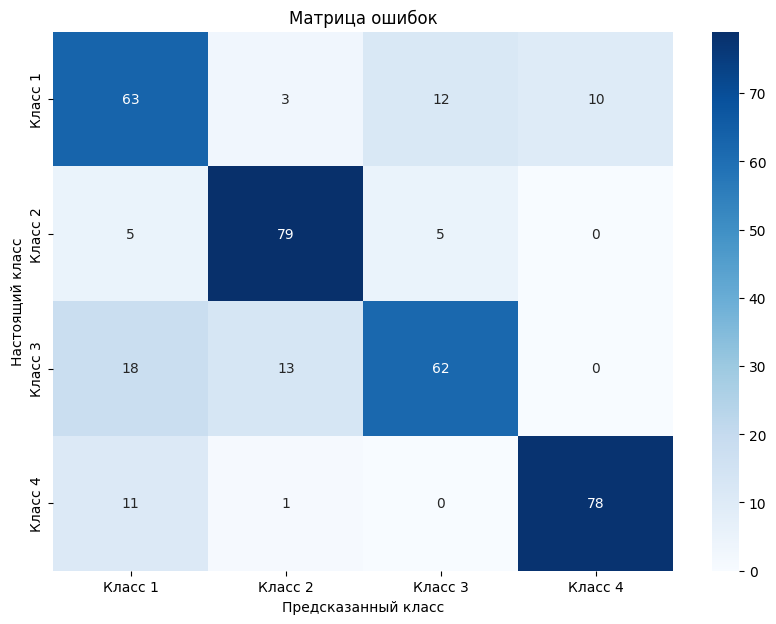

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 7,7% точнее, а на тренировочной хуже примерно на 6%, что сведетельствует об уменьшении переобучения (Разница между тренировочной и тестовой на изначальном бейзлайне: ~ 25% на улучшенном: ~ 11%)

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло случайному лесу обучиться правильнее и с большей точностью предсказывать ценовой класс телефона

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [ ]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Final Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Final Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
rf_regressor = RandomForestRegressor(random_state=42)  # Можно добавить гиперпараметры, если необходимо
rf_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

RandomForestRegressor(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [ ]:
y_test_pred_reg_optimized = rf_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = rf_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 101.5597
MAPE = 23.2280%
MSE = 32300.8683
RMSE = 179.7244

Оценка на тренировочной выборке:
MAE = 67.5493
MAPE = 14.8996%
MSE = 13355.5072
RMSE = 115.5660


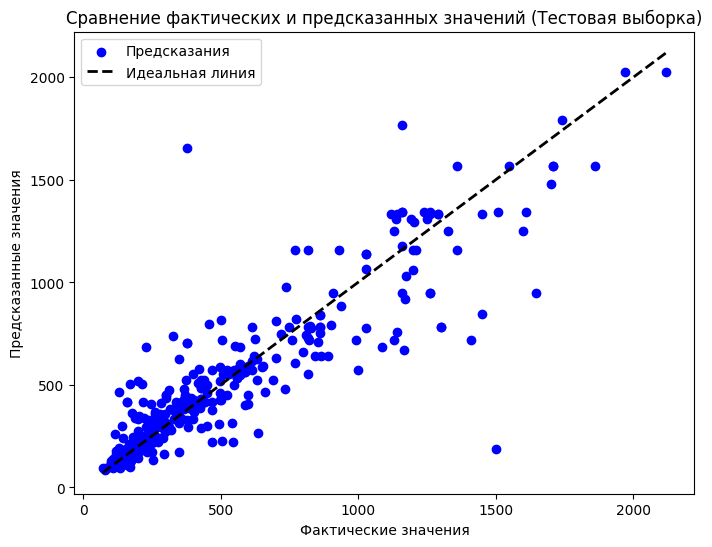

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE (Средняя абсолютная ошибка) уменьшилась с 122.99 до 101.55, что означает, что в среднем ошибки предсказания стали меньше.

MAPE (Средняя абсолютная процентная ошибка) снизилась с 26.86% до 23.22%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE (Среднеквадратичная ошибка) уменьшилась с 38871.49 до 32300.86, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE (Корень из MSE) снизился с 197.15 до 179.72, что также подтверждает снижение ошибок, особенно в больших значениях.

В общем, модель на улучшенном бейзлайне показала явное увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что стало меньше выбросов и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло случайному лесу обучиться правильнее и с большей точностью предсказывать стоимость телефона

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [ ]:
import numpy as np
from collections import Counter

# Функция для вычисления энтропии (для классификации)
def entropy(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Функция для вычисления индекса Джини (для классификации)
def gini_impurity(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return 1 - np.sum(probabilities ** 2)

# Функция для вычисления MSE (для регрессии)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Функция для поиска наилучшего разбиения
def best_split(X, y, criterion='gini'):
    best_impurity = float('inf')
    best_split_info = None
    n_samples, n_features = X.shape

    for feature_idx in range(n_features):
        possible_splits = np.unique(X[:, feature_idx])

        for threshold in possible_splits:
            left_mask = X[:, feature_idx] <= threshold
            right_mask = ~left_mask
            y_left, y_right = y[left_mask], y[right_mask]

            # Пропускаем разбиение, если хотя бы одна из частей пуста
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            if criterion == 'gini':
                impurity = gini_impurity(y_left) * len(y_left) / n_samples + gini_impurity(y_right) * len(y_right) / n_samples
            elif criterion == 'entropy':
                impurity = entropy(y_left) * len(y_left) / n_samples + entropy(y_right) * len(y_right) / n_samples
            elif criterion == 'mse':  # Для задачи регрессии
                left_pred = np.mean(y_left)
                right_pred = np.mean(y_right)
                impurity = (np.mean((y_left - left_pred) ** 2) * len(y_left) + np.mean((y_right - right_pred) ** 2) * len(y_right)) / n_samples
            else:
                raise ValueError("Criterion must be 'gini', 'entropy' or 'mse'")

            if impurity < best_impurity:
                best_impurity = impurity
                best_split_info = (feature_idx, threshold)

    return best_split_info

# Рекурсивная функция для построения дерева
def build_tree(X, y, task='classification', max_depth=None, min_samples_split=2, depth=0, criterion='gini'):
    n_samples, n_features = X.shape
    unique_classes = np.unique(y)

    # Останавливаемся, если есть только один класс или достигли максимальной глубины
    if len(unique_classes) == 1 or (max_depth and depth == max_depth) or n_samples < min_samples_split:
        if task == 'classification':
            return Counter(y).most_common(1)[0][0]  # Возвращаем наиболее частый класс
        elif task == 'regression':
            return np.mean(y)  # Возвращаем среднее значение для регрессии

    # Ищем лучшее разбиение
    best_split_info = best_split(X, y, criterion)
    if not best_split_info:
        return np.mean(y) if task == 'regression' else Counter(y).most_common(1)[0][0]  # Если не удалось найти разбиение

    feature_idx, threshold = best_split_info
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]

    # Рекурсивно строим дерево
    left_node = build_tree(X_left, y_left, task, max_depth, min_samples_split, depth+1, criterion)
    right_node = build_tree(X_right, y_right, task, max_depth, min_samples_split, depth+1, criterion)

    return (feature_idx, threshold, left_node, right_node)

# Функция для предсказания с использованием дерева
def predict_tree(tree, X):
    if isinstance(tree, tuple):
        feature_idx, threshold, left_node, right_node = tree
        if X[feature_idx] <= threshold:
            return predict_tree(left_node, X)
        else:
            return predict_tree(right_node, X)
    else:
        return tree  # Это лист, возвращаем предсказание (класс или значение)

# Функция для обучения и предсказания с деревом решений
def decision_tree(X_train, y_train, X_test, task='classification', max_depth=None, min_samples_split=2, criterion='gini'):
    tree = build_tree(X_train, y_train, task, max_depth, min_samples_split, criterion=criterion)
    y_pred = np.array([predict_tree(tree, x) for x in X_test])
    return y_pred

# Реализация случайного леса
def random_forest(X_train, y_train, X_test, n_estimators=100, max_depth=None, min_samples_split=2, criterion='gini', task='classification', max_features=None):
    n_samples, n_features = X_train.shape
    predictions = []

    if max_features is None:
        max_features = n_features  # Если не задано, используем все признаки

    for _ in range(n_estimators):
        # Бэггинг: случайный выбор подмножества данных
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train.iloc[indices]

        # Случайный выбор подмножества признаков
        features = np.random.choice(n_features, size=max_features, replace=False)
        X_bootstrap = X_bootstrap[:, features]

        # Строим дерево для каждого подмножества
        tree = build_tree(X_bootstrap, y_bootstrap, task=task, max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)

        # Предсказания для теста
        # Исправлено: используем только выбранные признаки
        X_test_selected_features = X_test[:, features]  # Убедитесь, что это NumPy массив
        tree_preds = np.array([predict_tree(tree, x) for x in X_test_selected_features])
        predictions.append(tree_preds)

    predictions = np.array(predictions).T  # Транспонируем для удобства

    # Аггрегируем предсказания
    if task == 'classification':
        # Классификация: голосуем за наиболее частое значение
        final_preds = [Counter(preds).most_common(1)[0][0] for preds in predictions]
    elif task == 'regression':
        # Регрессия: усредняем предсказания
        final_preds = np.mean(predictions, axis=1)

    return np.array(final_preds)

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [ ]:
y_pred_base = random_forest(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, n_estimators=10, max_depth=10, criterion='entropy', task='classification')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.7417582417582418
Balanced accuracy = 0.7394787996241484


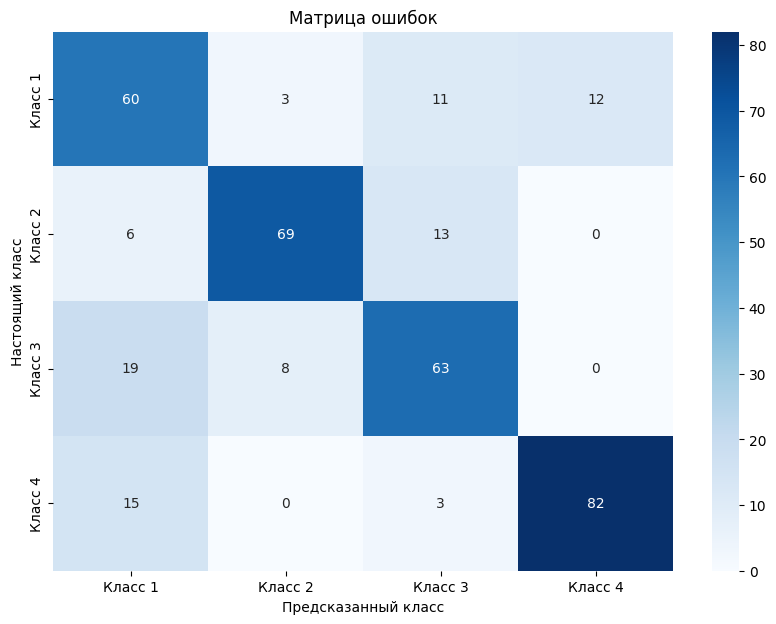

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.035 выше, я предполагаю что это может быть связано с различиями реализации.

Классы 1, 2, 3 стали на 4, 3, 10 раз чаще угадываться правильно, в то время как остальные 4 класс не изменил количество удачных предсказаний.

**e.	Сделать выводы**

Моя имплементацияя классификации с применением случайного леса работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [ ]:
y_pred_optimized = random_forest(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, n_estimators=100, max_depth=10, criterion='gini', task='classification')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.75
Balanced accuracy = 0.7505121439110203


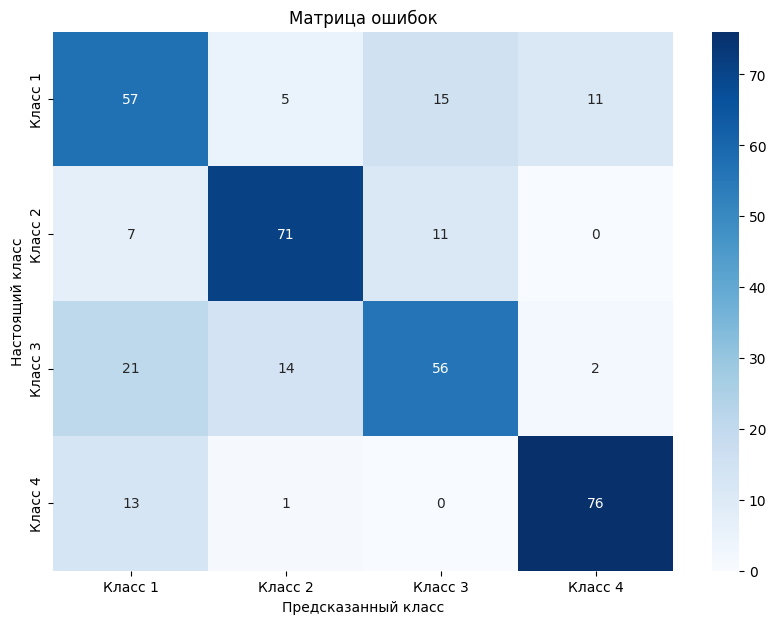

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.03 хуже, я предполагаю что это связано с деталями реализации алгоритма.

Все классы стали реже получать правильное предсказание на 6, 8, 4, 2 раза соответственно

**j.	Сделать выводы**

Моя имплементацияя классификации с применением случайного леса работает примерно с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [ ]:
y_pred_base = random_forest(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, n_estimators=10, max_depth=10, criterion='mse', task='regression')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 122.6960
MAPE = 27.6502%
MSE = 40420.5809
RMSE = 201.0487


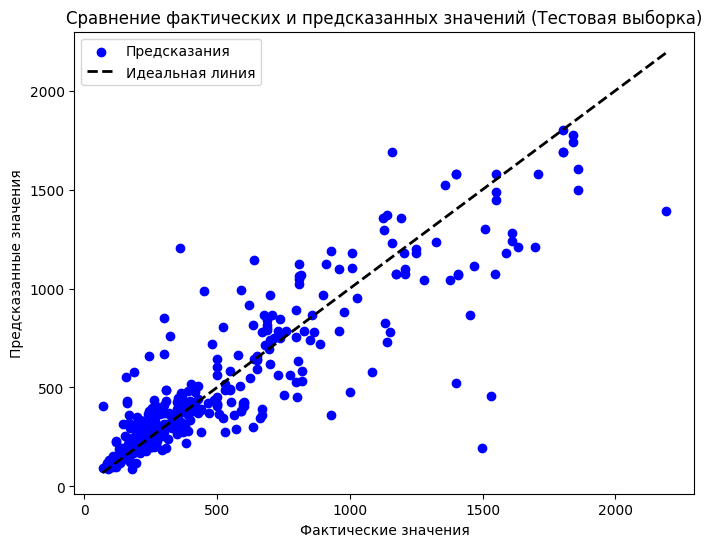

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Сравним метрики (слева будет моя имплементация, справа имплементация из sklearn)

MAE: 122.6960 vs 122.9956  
MAPE: 27.6502% vs 26.8666%  
MSE: 40420.5809 vs 38871.4932  
RMSE: 201.0487 vs 197.1585  

В целом ухудшения не произошло, как мы можем видеть кучность точек на диаграммах рассеивания не изменилась, не добавилось новых выбросов, просто изменились расположения некоторых отдельных точек, что как раз и привело к небольшому ухудшению MAE, MAPE, MSE, RMSE

**e.	Сделать выводы**

Моя имплементацияя регрессии с применением случайного леса работает примерно с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [ ]:
y_pred_optimized = random_forest(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, n_estimators=100, max_depth=10, criterion='mse', task='regression')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 104.1647
MAPE = 24.0724%
MSE = 32412.2221
RMSE = 180.0339


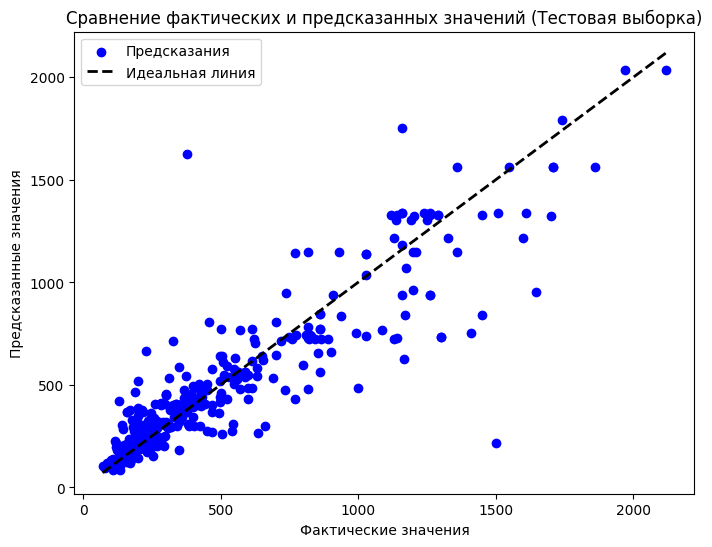

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Сравним метрики (слева будет моя имплементация, справа имплементация из sklearn)

MAE: 104.1647 vs 101.5597   
MAPE: 24.0724% vs 23.2280%  
MSE: 32412.2221 vs 32300.8683  
RMSE: 180.0339 vs 179.7244  

В целом ухудшения не произошло, как мы можем видеть кучность точек на диаграммах рассеивания не изменилась, не добавилось новых выбросов, просто изменились расположения некоторых отдельных точек, что как раз и привело к небольшому ухудшению MAE, MAPE, MSE, RMSE

**j.	Сделать выводы**

Моя имплементацияя регрессии с применением случайного леса работает с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

# **Лабораторная работа 5**

# **Проведение исследований с градиентным бустингом**

## **2. Создание бейзлайна и оценка качества**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [ ]:
# Разделение данных для классификации

# Странно обучать как по уже известным классам найти тот же самый класс
# Так и как по уже известной стоимости найти класс определённый через стоимость
X_classification_base = df_base.drop(["Final Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
gb_classifier = GradientBoostingClassifier(random_state=42)  # Можно добавить гиперпараметры, если необходимо
gb_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

GradientBoostingClassifier(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
y_test_pred_cls_base = gb_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = gb_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7225274725274725
Balanced accuracy = 0.7199274723984026

Оценка на тренировочной выборке:
Accuracy = 0.8347107438016529
Balanced accuracy = 0.835308609144042


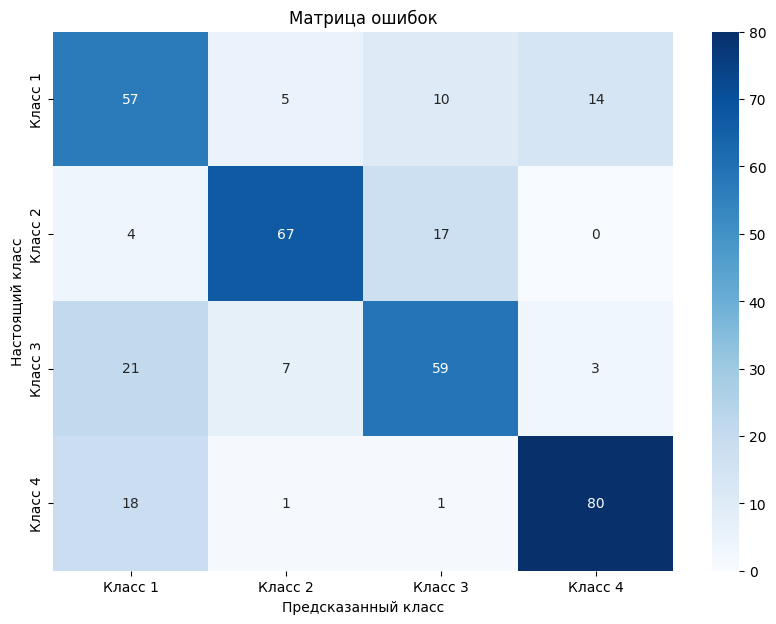

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 72.25%, что является не является выдающимся результатом, но и не ужасным при предсказании одного из 4 классов.

In [ ]:
# Проверяем нулевую оценку точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2747


Мы видим, что показатель точности нашей модели равен 0,7225, а нулевой показатель точности равен 0,2747. Таким образом, мы можем заключить, что наша модель логистической регрессии хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [ ]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Final Price', 'Price Class'], axis=1)
y_regression_base = df_base["Final Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
gb_regressor = GradientBoostingRegressor(random_state=42)  # Можно добавить гиперпараметры, если необходимо
gb_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

GradientBoostingRegressor(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
y_test_pred_reg_base = gb_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = gb_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 124.4211
MAPE = 29.5335%
MSE = 36575.6460
RMSE = 191.2476

Оценка на тренировочной выборке:
MAE = 100.1785
MAPE = 25.8681%
MSE = 21861.4175
RMSE = 147.8561


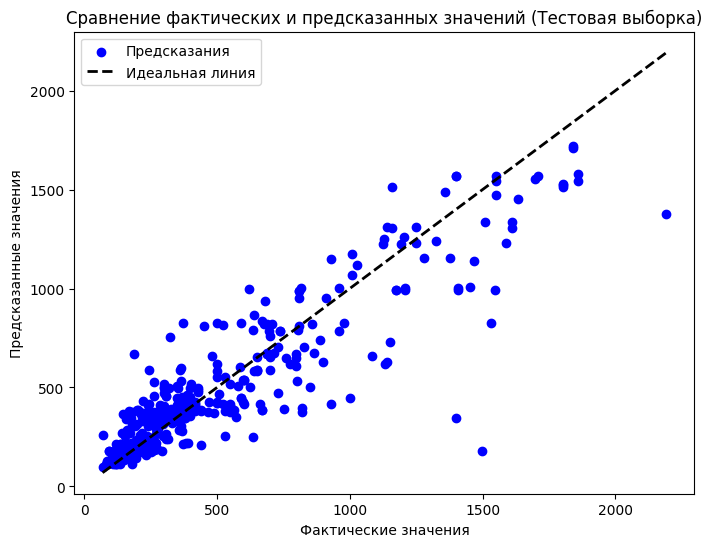

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

Важно заметить, что метрики, такие как MAPE (29.53%) на валидационной выборке и MAE (124.42), достаточно низкие. Это значит, что модель, хоть и не идеальна, вполне может быть использована для задачи регрессии на данном наборе данных

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

Данные раздел препроцессингом, визуализацией данных и формированием новых признаков никак не будет отличаться от того что было в 1 лабораторной, так что я не буду повторяться

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [ ]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Final Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации
gb_classifier = GradientBoostingClassifier(random_state=42)  # Можно добавить гиперпараметры, если необходимо
gb_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

GradientBoostingClassifier(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [ ]:
# Оценка модели классификации
y_pred_train_cls_optimized = gb_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = gb_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7361111111111112
Balanced accuracy = 0.7368296502538981

Оценка на тренировочной выборке:
Accuracy = 0.8214037526059764
Balanced accuracy = 0.8211458213422356


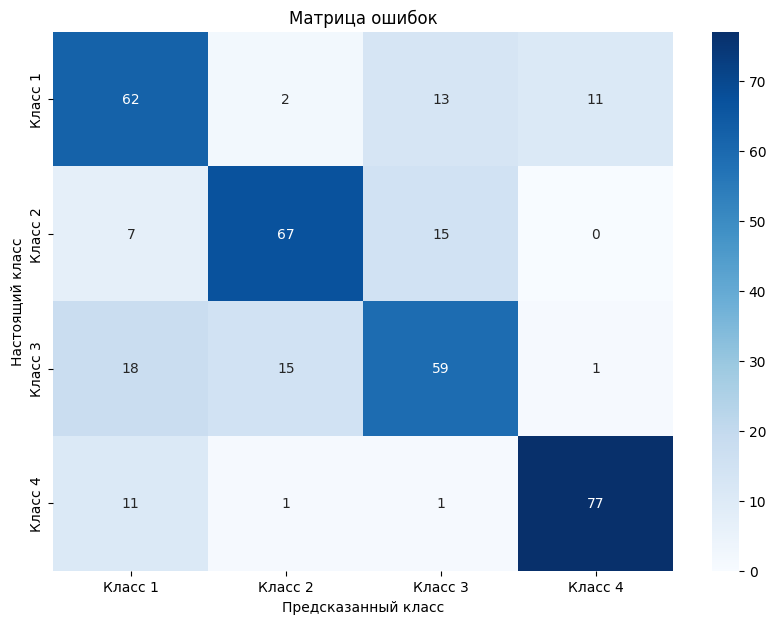

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 1,4% точнее, а на тренировочной ухудшилось примерно на 1,3% (что может свидетельствовать о постепенном избавлении от переобучения)

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло градиентному бустингу обучиться правильнее и с большей точностью предсказывать ценовой класс телефона

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [ ]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Final Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Final Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
gb_regressor = GradientBoostingRegressor(random_state=42)  # Можно добавить гиперпараметры, если необходимо
gb_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

GradientBoostingRegressor(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [ ]:
y_test_pred_reg_optimized = gb_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = gb_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 112.2774
MAPE = 28.0399%
MSE = 33511.0870
RMSE = 183.0603

Оценка на тренировочной выборке:
MAE = 104.9155
MAPE = 26.7521%
MSE = 24504.8068
RMSE = 156.5401


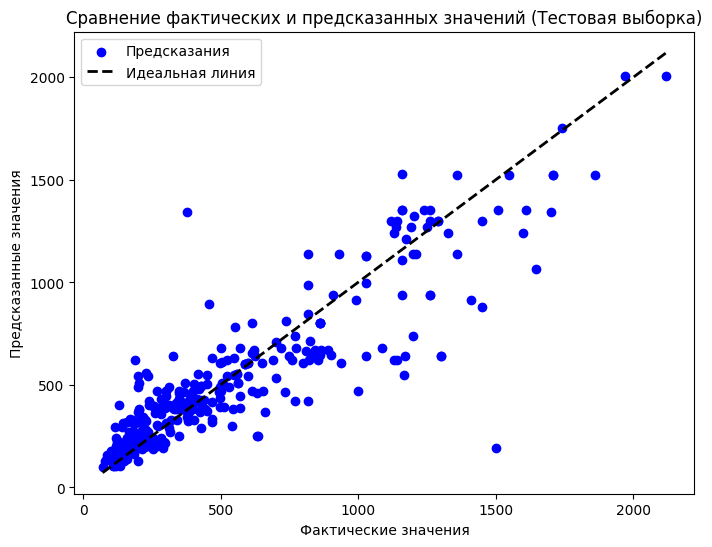

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE (Средняя абсолютная ошибка) уменьшилась с 124.42 до 112.27, что означает, что в среднем ошибки предсказания стали меньше.

MAPE (Средняя абсолютная процентная ошибка) снизилась с 29.53% до 28.03%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE (Среднеквадратичная ошибка) уменьшилась с 36575.64 до 33511.08, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE (Корень из MSE) снизился с 191.24 до 183.06, что также подтверждает снижение ошибок, особенно в больших значениях.

В общем, модель на улучшенном бейзлайне показала явное увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что стало меньше выбросов и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Дублирующие данные были избыточны; данные с низкой корреляцией относительно целевых столбцов мешали модели; применять labelEncoder к столбцу Brand было небрежно и неправильно и новая фича позволила достичь большей корреляции с целевыми столбцами, что в совокупности помогло градиентному бустингу обучиться правильнее и с большей точностью предсказывать стоимость телефона

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [ ]:
import numpy as np
from collections import Counter

# Функция для градиентного бустинга с поддержкой классификации и регрессии
def gradient_boosting(X_train, y_train, X_test, task='classification', n_estimators=100, learning_rate=0.1, max_depth=None, min_samples_split=2, criterion='gini'):
    if task == 'classification':
        # Переводим метки классов в числовые значения для классификации
        class_map = {label: idx for idx, label in enumerate(np.unique(y_train))}
        y_train_num = np.array([class_map[label] for label in y_train])
    elif task == 'regression':
        # Для регрессии метки остаются числовыми
        y_train_num = np.array(y_train)
    else:
        raise ValueError("Task must be 'classification' or 'regression'")

    # Инициализируем прогнозы
    if task == 'classification':
        # Инициализация с вероятностями классов (среднее по меткам)
        y_pred_train = np.full_like(y_train_num, np.mean(y_train_num), dtype=float)
        y_pred_test = np.full_like(np.zeros(X_test.shape[0]), np.mean(y_train_num), dtype=float)
    elif task == 'regression':
        # Инициализация с нулями для регрессии
        y_pred_train = np.zeros_like(y_train_num, dtype=float)
        y_pred_test = np.zeros_like(np.zeros(X_test.shape[0]), dtype=float)

    # Строим деревья
    trees = []

    for _ in range(n_estimators):
        # Строим текущее дерево на основе ошибок текущих предсказаний
        residuals = y_train_num - y_pred_train
        tree = build_tree(X_train, residuals, task='regression', max_depth=max_depth, min_samples_split=min_samples_split, criterion='mse')
        trees.append(tree)

        # Обновляем предсказания
        for i, x in enumerate(X_train):
            y_pred_train[i] += learning_rate * predict_tree(tree, x)

        # Для тестовых данных обновляем предсказания
        for i, x in enumerate(X_test):
            y_pred_test[i] += learning_rate * predict_tree(tree, x)

    # Возвращаем предсказания для тестовой выборки
    if task == 'classification':
        # Для классификации возвращаем вероятности классов (классы)
        y_pred_test_classes = np.round(y_pred_test).astype(int)
        reverse_class_map = {v: k for k, v in class_map.items()}
        y_pred_test_labels = [reverse_class_map[label] for label in y_pred_test_classes]
        return np.array(y_pred_test_labels)

    elif task == 'regression':
        # Для регрессии возвращаем предсказанные значения
        return y_pred_test

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [ ]:
y_pred_base = gradient_boosting(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, task='classification', n_estimators=100, learning_rate=0.1)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6730769230769231
Balanced accuracy = 0.6690453958186516


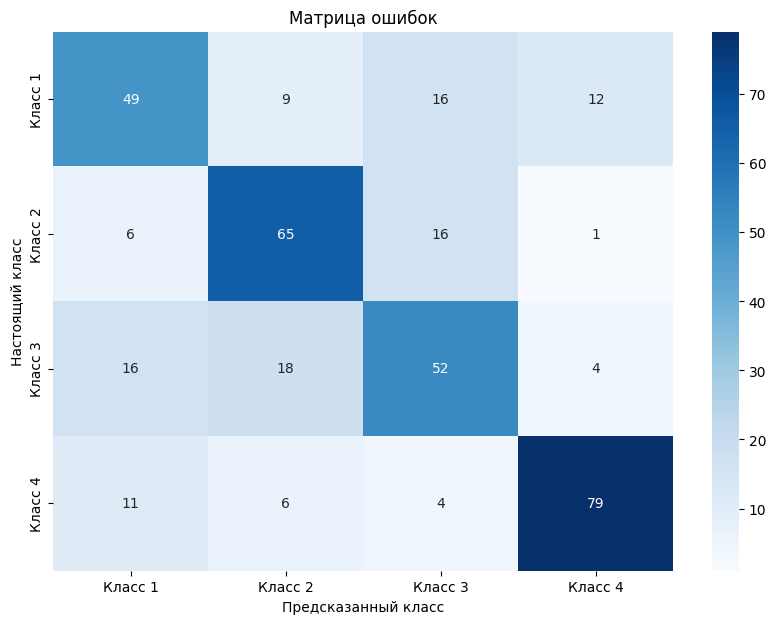

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.05 ниже, я предполагаю что это связано из-за различий в реализации.

Классы 1, 2, 3, 4 стали на 8, 2, 7, 1 раз соответсвенно реже угадываться правильно.

**e.	Сделать выводы**

Моя имплементацияя классификации с применением градиентного бустинга работает примерно с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [ ]:
y_pred_optimized = gradient_boosting(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, task='classification', n_estimators=100, learning_rate=0.1)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6805555555555556
Balanced accuracy = 0.6805782315727041


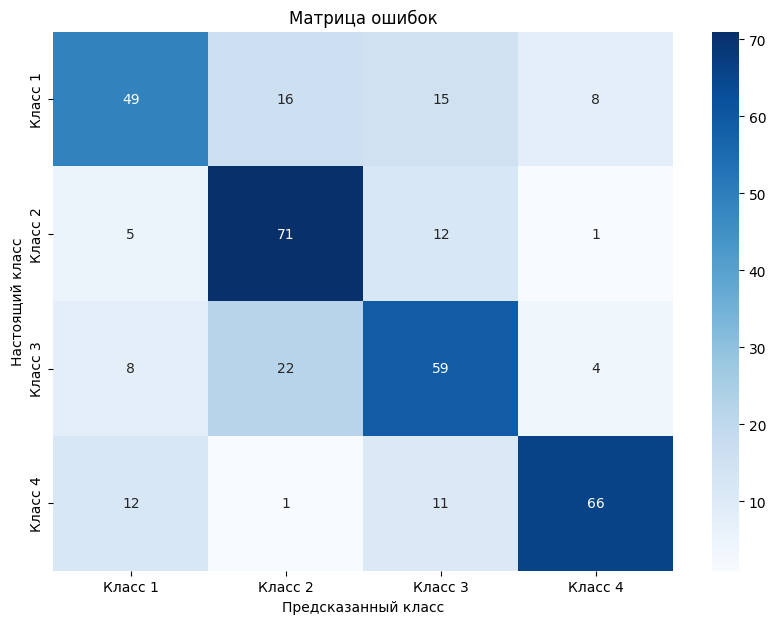

In [ ]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

accuracy, balanced accuracy у моей имплементации почти такие же как у модели sklearn, но всё таки на ~0.05 ниже, я предполагаю что это связано из-за различий в реализации.

Классы 1, 4 стали на 13, 11 раз соответсвенно реже угадываться правильно, в то время как класс 2 стал угадывать на 4 раза чаще, а 3 класс не изменил количество правильных предсказаний.

**j.	Сделать выводы**

Моя имплементацияя классификации с применением градиентного бустинга работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне, что является показателем хорошо проделанной работы

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [ ]:
y_pred_base = gradient_boosting(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, task='classification', n_estimators=100, learning_rate=0.1)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 134.3411
MAPE = 28.1684%
MSE = 49984.9073
RMSE = 223.5730


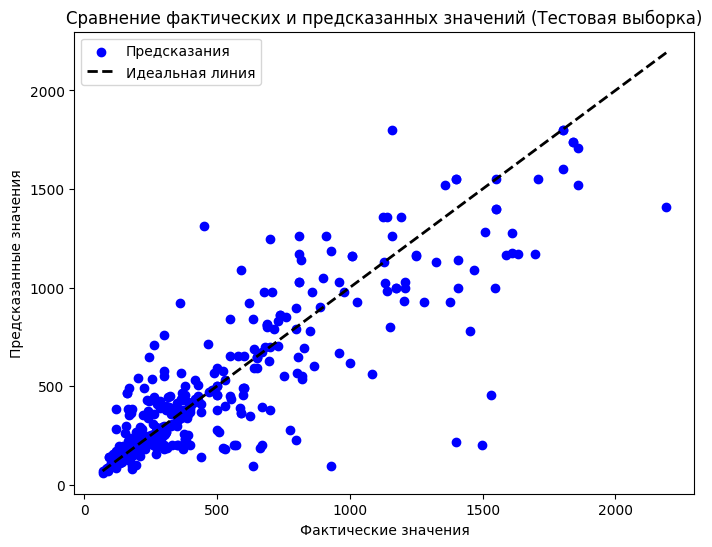

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Сравнение метрик (слева моя имплементация, справа реализация из sklearn)

MAE: 134.3411 vs 124.4211  
MAPE: 28.1684% vs 29.5335%  
MSE: 49984.9073 vs 36575.6460  
RMSE: 223.5730 vs 191.2476  

В целом ухудшения произошло не сильное, как мы можем видеть кучность точек у моей имплементации выше в диапазоне от 60 до 500 на диаграммах рассеивания но часть точек в диапазоне от 700 до 1000 сместилась дальше от идеальной линии, что привело к ухудшению MAE, MSE, RMSE (так как много маленьких ошибок уменьшились, но часть больших увеличилась) и улучшению MAPE

**e.	Сделать выводы**

Моя имплементацияя регрессии с применением градиентного бустинга работает примерно с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Так как в основном всё что мне помогло - предобработка данных и её визуализация, повторять данную процедуру я не буду и просто обучу модель на уже улучшенных данных

**g.	Обучить модели для выбранного набора данных**

In [ ]:
y_pred_optimized = gradient_boosting(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, task='classification', n_estimators=100, learning_rate=0.1)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [ ]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 97.7754
MAPE = 20.0485%
MSE = 34090.1099
RMSE = 184.6351


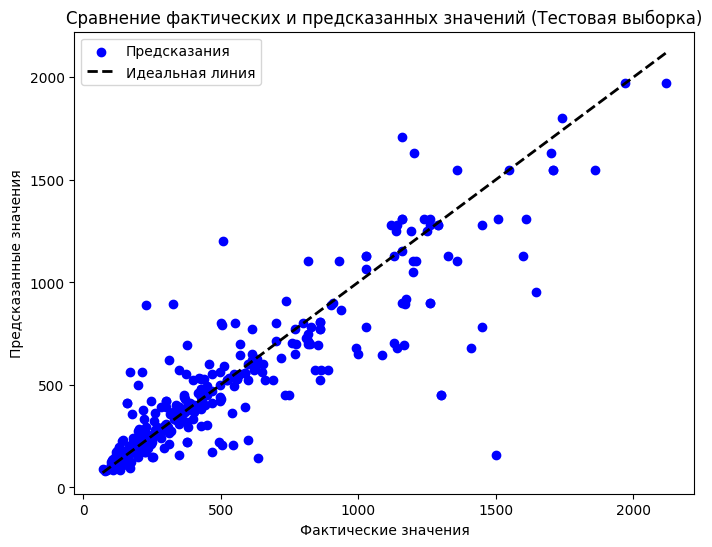

In [ ]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Сравнение метрик (слева моя имплементация, справа реализация из sklearn)

MAE: 97.7754 vs 112.2774  
MAPE: 20.0485% vs 28.0399%  
MSE: 34090.1099 vs 33511.0870  
RMSE: 184.6351 vs 183.0603  

В целом произошло улучшение, как мы видим по метрикам. Если судить по диаграммам рассеивания, снова виднеется уплотнение точек в диапазоне от 60 до 700, что привело к улучшению MAE, MAPE. Но появилось немного отдельных точек имеющих большую ошибку, что ухудшило MSE, RMSE

**j.	Сделать выводы**

Моя имплементацияя регрессии с применением градиентного бустинга работает практически с той же точностью, что и реализация sklearn на данном наборе данных, что является показателем хорошо проделанной работы

# Подведение итогов

В следующей таблице в ячейках, относящихся к классифкации я буду отображать **accuracy**; в ячейках, относящихся к регрессии я буду отображать **MAE** и в скобках (**MAPE**)

|Алгоритм|    Задача   |Бейзлайн|Улучшенный бейзлайн|Самостоятельная имплементация алгоритма|
|:------:|:-----------:|:------:|:-----------------:|:-------------------------------------:|
|KNN     |классификация|0.6291  |0.7556             |0.7222                                 |
|        |регрессия    |158.5869 <br> (38.1310%)|110.8991 <br> (25.2993%)|109.3256 <br> (25.2951%)|
|Линейные модели|классификация|0.5219  |0.525             |0.5306                                 |
|        |регрессия    |210.3182 <br> (51.8933%)|202.4122 <br> (53.6364%)|203.6512 <br> (54.3687%)|
|Решающее дерево|классификация|0.7005  |0.75              |**0.75**                                   |
|        |регрессия    |136.6670 <br> (30.7884%)|108.6093 <br> (24.4918%)|104.9442 <br> (22.7875%)|
|Случайный лес  |классификация|0.7060  |**0.7833**           |**0.75**                                  |
|        |регрессия    |**122.9956 <br> (26.8666%)**|**101.5597 <br> (23.2280%)**|104.1647 <br> (24.0724%)|
|Градиентный бустинг|классификация|**0.7225**  |0.73611       |0.6806                                 |
|        |регрессия    |124.4211 <br> (29.5335%)|112.2774 <br> (28.0399%)|**97.7754 <br> (20.0485%)** |

<br><br>
Укажу по 2 лучшие модели для каждого отдельного кейса:
<br>

**Классификация**

*Бейзлайн*:  
$ 1) Градиентный\ бустинг; 2) Случайный\ лес $  

*Улучшенный бейзлайн*:  
$ 1) Случайный\ лес; 2) Решающее\ дерево $

*Самостоятельная имплементация алгоритма*:  
$ 1) Градиентный\ бустинг; 2) Случайный\ лес $  

<br>

**Регрессия**

*Бейзлайн*:  
$ 1) Случайный\ лес; 2) Градиентный\ бустинг; $ 

*Улучшенный бейзлайн*:  
$ 1) Случайный\ лес; 2) Решающее\ дерево $  

*Самостоятельная имплементация алгоритма*:  
$ 1) Градиентный\ бустинг; 2) Случайный\ лес $  

Хуже всего на моих данных показали себя линейные модели, моё предположение, что это связано с тем, что данные, вероятно, характеризуются нелинейными зависимостями, шумом и/или сложными взаимодействиями между переменными, что катастрофически сказывается на точности линейных моделей.

Лучше всего себя показал случайный лес, что по моему мнению, было связано с переобучением отдельных деревьев, что положительно сказалось на итоговом результате. Случайный лес сумел извлечь больше информации из моих данных благодаря своей способности обрабатывать сложные взаимоотношения и устойчивости к переобучению, что и привело к его превосходным результатам.

<br>

В заключение хотелось бы сказать, что это было увлекательно - проводить исследования с различными моделями и пытаться понять, что значат те или иные показатели метрик.
